<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [57]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from scipy.stats import chi2_contingency, pearsonr, f_oneway, shapiro, spearmanr, kruskal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [58]:
df_customers = pd.read_csv("Data/customers.csv", sep=";",dtype={'client_id':'str','sex':'str','birth':'int'})
df_products = pd.read_csv("Data/products.csv", sep=";",dtype={'id_prod':'str','price':'float','categ':'str'})
df_transactions = pd.read_csv("Data/Transactions.csv", sep=";",dtype={'id_prod':'str','session_id':'str','client_id':'str'},parse_dates=['date'])

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2 - Analyse exploratoire des fichiers</h2>
</div>

In [59]:
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8616,c_7920,m,1956
8617,c_7403,f,1970
8618,c_5119,m,1974
8619,c_5643,f,1968


In [60]:
current_year = datetime.now().year
df_customers['age'] = current_year - df_customers['birth']
del df_customers['birth']

In [61]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   age        8621 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 168.5+ KB


In [62]:
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


In [63]:
#Max et Min des produits par price
df_products.loc[(df_products["price"]==df_products["price"].min()) | (df_products["price"]==df_products["price"].max())]

,id_prod,price,categ
946,2_2,300.00,2
2271,0_528,0.62,0
2354,0_202,0.62,0


In [64]:
df_transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
1048570,NaN,NaT,NaN,NaN
1048571,NaN,NaT,NaN,NaN
1048572,NaN,NaT,NaN,NaN
1048573,NaN,NaT,NaN,NaN


In [65]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 32.0+ MB


In [66]:
# Nombre total de lignes dans transactions
total_rows_transactions = df_transactions.shape[0]

# Nombre de lignes contenant uniquement des NaN
na_rows_transactions = df_transactions[df_transactions.isna().all(axis=1)].shape[0]

# Calcul du pourcentage
percentage_na_transactions = (na_rows_transactions / total_rows_transactions) * 100

print(f"Nombre de lignes qui seront supprimées : {na_rows_transactions}")
print(f"Ce qui équivaut à : {percentage_na_transactions:.2f}% de la table")
del total_rows_transactions
del na_rows_transactions
del percentage_na_transactions

Nombre de lignes qui seront supprimées : 361041
Ce qui équivaut à : 34.43% de la table


In [67]:
df_transactions.dropna(how='all', inplace=True)
df_transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


In [68]:
#Vérifier les client_id avec une regex
import re

# Définir une fonction pour vérifier le format
def check_format(client_id):
    # Vérifier si le client_id correspond au format attendu
    if pd.isna(client_id):
        return "NaN"
    elif re.match(r'^c_\d+$', str(client_id)):
        return "Valid"
    else:
        return "Invalid"

# Appliquer la fonction à la colonne client_id
df_transactions['format_check'] = df_transactions['client_id'].apply(check_format)

# Compter les valeurs 
df_transactions['format_check'].value_counts()


format_check
Valid    687534
Name: count, dtype: int64

In [69]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687533
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_prod       687534 non-null  object        
 1   date          687534 non-null  datetime64[ns]
 2   session_id    687534 non-null  object        
 3   client_id     687534 non-null  object        
 4   format_check  687534 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 31.5+ MB


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3 - Analyse des données</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Évolution du chiffre d'affaires</h3>
</div>

In [70]:
# Fusionner transactions avec produits pour obtenir les prix
df_transactions_products = df_transactions.merge(df_products,how="outer", on='id_prod', indicator=True)

In [71]:
df_transactions_products

,id_prod,date,session_id,client_id,format_check,price,categ,_merge
0,0_0,2021-03-01 13:45:51.575117,s_282,c_5152,Valid,3.75,0,both
1,0_0,2021-03-02 06:42:55.351333,s_621,c_2917,Valid,3.75,0,both
2,0_0,2021-03-02 18:49:49.651862,s_852,c_3988,Valid,3.75,0,both
3,0_0,2021-03-02 21:57:33.862118,s_908,c_1004,Valid,3.75,0,both
4,0_0,2021-03-03 23:59:48.997483,s_1379,c_278,Valid,3.75,0,both
...,...,...,...,...,...,...,...,...
687550,2_99,2022-05-21 01:53:46.967570,s_211661,c_5828,Valid,84.99,2,both
687551,2_99,2022-07-21 01:53:46.967570,s_241374,c_5828,Valid,84.99,2,both
687552,2_99,2022-11-11 20:56:49.820935,s_296127,c_7135,Valid,84.99,2,both
687553,2_99,2022-12-11 20:56:49.820935,s_310606,c_7135,Valid,84.99,2,both


In [72]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
df_transactions_products['_merge'].value_counts()

_merge
both          687534
right_only        21
left_only          0
Name: count, dtype: int64

In [73]:
# Calculer le pourcentage des données mises de côté
per_invite = (df_transactions_products['_merge'].value_counts()['right_only'] / df_transactions_products['_merge'].value_counts()['both']) * 100

print(f'Nous avons décidé de laisser de côté {per_invite:.3f}% des données pour éviter les erreurs en attendant la confirmation du client.')


Nous avons décidé de laisser de côté 0.003% des données pour éviter les erreurs en attendant la confirmation du client.


In [74]:
# Clean (Pour l'instant on décide d'extraire ces données, en attendant la confirmation du client, cela va nous permettre de continuer notre analyse)
df_invite = df_transactions_products[df_transactions_products["_merge"]=='right_only']
del df_invite['_merge']
df_transactions_products = df_transactions_products[df_transactions_products["_merge"]=='both']
del df_transactions_products['_merge']

In [75]:
df_invite

,id_prod,date,session_id,client_id,format_check,price,categ
6073,0_1014,NaT,NaN,NaN,NaN,1.15,0
6511,0_1016,NaT,NaN,NaN,NaN,35.06,0
8723,0_1025,NaT,NaN,NaN,NaN,24.99,0
21687,0_1062,NaT,NaN,NaN,NaN,20.08,0
40971,0_1119,NaT,NaN,NaN,NaN,2.99,0
94245,0_1318,NaT,NaN,NaN,NaN,20.92,0
297077,0_1620,NaT,NaN,NaN,NaN,0.80,0
299185,0_1624,NaT,NaN,NaN,NaN,24.50,0
311123,0_1645,NaT,NaN,NaN,NaN,2.99,0
323013,0_1780,NaT,NaN,NaN,NaN,1.67,0


In [76]:
df_transactions_products

,id_prod,date,session_id,client_id,format_check,price,categ
0,0_0,2021-03-01 13:45:51.575117,s_282,c_5152,Valid,3.75,0
1,0_0,2021-03-02 06:42:55.351333,s_621,c_2917,Valid,3.75,0
2,0_0,2021-03-02 18:49:49.651862,s_852,c_3988,Valid,3.75,0
3,0_0,2021-03-02 21:57:33.862118,s_908,c_1004,Valid,3.75,0
4,0_0,2021-03-03 23:59:48.997483,s_1379,c_278,Valid,3.75,0
...,...,...,...,...,...,...,...
687550,2_99,2022-05-21 01:53:46.967570,s_211661,c_5828,Valid,84.99,2
687551,2_99,2022-07-21 01:53:46.967570,s_241374,c_5828,Valid,84.99,2
687552,2_99,2022-11-11 20:56:49.820935,s_296127,c_7135,Valid,84.99,2
687553,2_99,2022-12-11 20:56:49.820935,s_310606,c_7135,Valid,84.99,2


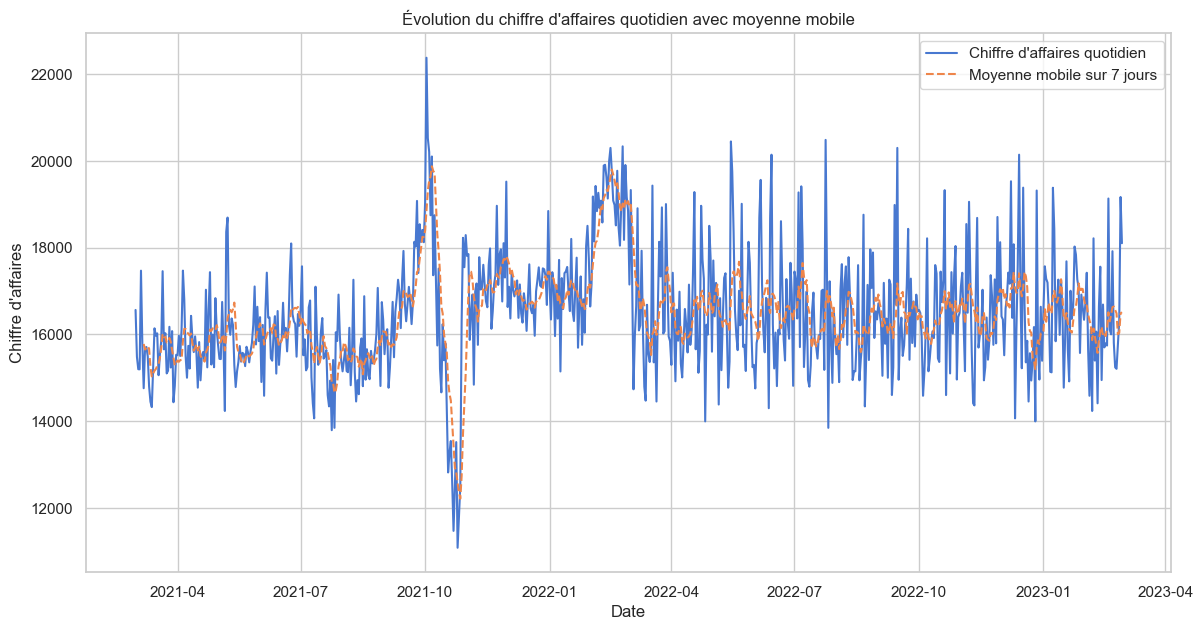

In [77]:
# Calculer le chiffre d'affaires par 7 jours et ajouter une moyenne mobile
daily_revenue = df_transactions_products.groupby(df_transactions_products['date'].dt.date)['price'].sum()
daily_revenue = daily_revenue.to_frame(name='daily_revenue')
daily_revenue['7d_moving_avg'] = daily_revenue['daily_revenue'].rolling(window=7).mean()


#Palette de couleurs
sns.set_theme(style='whitegrid', palette='muted')

# Tracer le graphique
plt.figure(figsize=(14, 7))
plt.plot(daily_revenue.index, daily_revenue['daily_revenue'], label="Chiffre d'affaires quotidien")
plt.plot(daily_revenue.index, daily_revenue['7d_moving_avg'], label='Moyenne mobile sur 7 jours', linestyle='--')
plt.title("Évolution du chiffre d'affaires quotidien avec moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()


In [78]:
del daily_revenue

In [79]:
df_transactions

,id_prod,date,session_id,client_id,format_check
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,Valid
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,Valid
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,Valid
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,Valid
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,Valid
...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,Valid
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,Valid
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,Valid
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,Valid


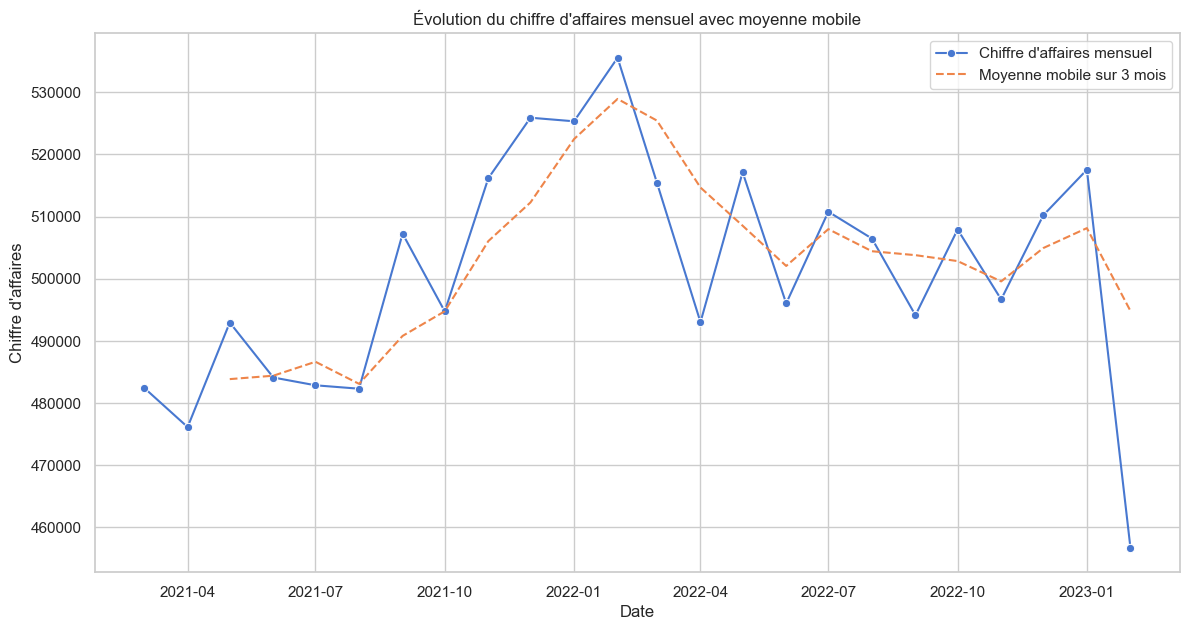

In [80]:
# Calculer le chiffre d'affaires par mois
monthly_revenue = df_transactions_products.groupby(df_transactions_products['date'].dt.to_period("M"))['price'].sum()

# Convertir l'index pour un affichage correct
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# Calculer la moyenne mobile sur 3 mois (par exemple)
monthly_revenue_moving_avg = monthly_revenue.rolling(window=3).mean()

# Tracer le graphique avec Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue, label="Chiffre d'affaires mensuel", marker='o')
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue_moving_avg, label='Moyenne mobile sur 3 mois', linestyle='--')
plt.title("Évolution du chiffre d'affaires mensuel avec moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()

In [81]:
def gini_coefficient(x):
    # Trier les valeurs
    sorted_x = np.sort(x)
    n = len(x)
    
    # Calculer l'indice de Gini en suivant la formule
    cumulative_sum = np.cumsum(sorted_x) 
    gini_index = (2 / n) * np.sum((np.arange(1, n+1)) * sorted_x) / cumulative_sum[-1] - (n + 1) / n
    
    # Interprétation du Gini Index
    if gini_index == 0:
        interpretation = "Indique une distribution totalement égalitaire. Chaque client génère exactement le même chiffre d'affaires."
    elif 0 < gini_index < 0.3:
        interpretation = "Généralement considéré comme un faible niveau d'inégalité. La distribution du chiffre d'affaires entre les clients est relativement égalitaire."
    elif 0.3 <= gini_index < 0.5:
        interpretation = "Représente un niveau modéré d'inégalité. Certains clients génèrent plus de chiffre d'affaires que d'autres, mais l'inégalité n'est pas extrême."
    elif 0.5 <= gini_index < 0.7:
        interpretation = "Indique un niveau élevé d'inégalité. Une grande partie du chiffre d'affaires est concentrée entre les mains d'un petit nombre de clients."
    elif gini_index >= 0.7:
        interpretation = "Indique une très forte inégalité. Un ou quelques clients génèrent presque tout le chiffre d'affaires."
    else:
        interpretation = "Erreur dans le calcul ou l'interprétation de l'indice de Gini."
    
    return gini_index, interpretation

In [82]:
#indice de GINI pour le CA
revenue_per_client = df_transactions_products.groupby('client_id')['price'].sum()
gini_index, interpretation = gini_coefficient(revenue_per_client.values)

# Affichage du résultat
print(f"Indice de Gini pour le CA par client: {gini_index:.4f}")
print(interpretation)

Indice de Gini pour le CA par client: 0.4419
Représente un niveau modéré d'inégalité. Certains clients génèrent plus de chiffre d'affaires que d'autres, mais l'inégalité n'est pas extrême.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Chiffre d'affaires par catégorie</h3>
</div>

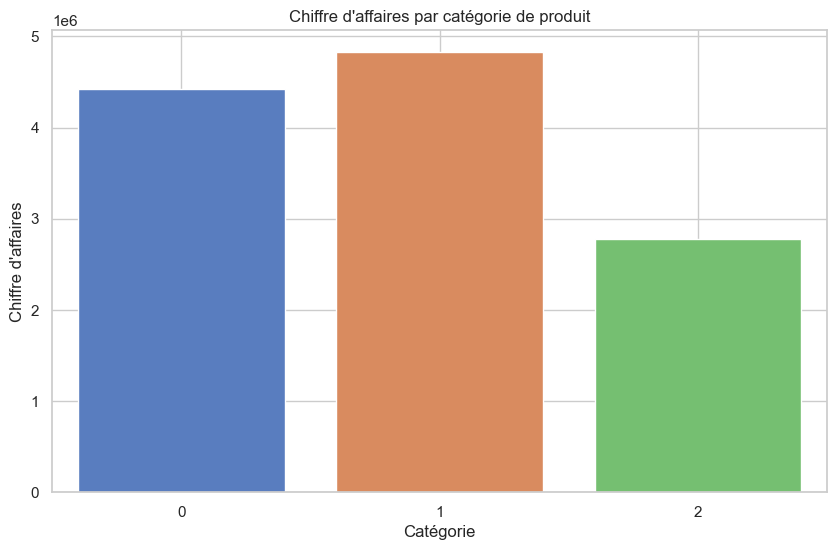

In [83]:
# Calculer le chiffre d'affaires par catégorie de produit
revenue_by_category = df_transactions_products.groupby('categ')['price'].sum()

# Définir les couleurs en fonction des catégories
colors = {'0':'blue', '1':'orange', '2':'green'}
# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.title("Chiffre d'affaires par catégorie de produit")
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values,hue=revenue_by_category.index, palette='muted')
plt.xlabel("Catégorie")
plt.ylabel("Chiffre d'affaires")
plt.grid(True)
plt.show()


In [84]:
df_transactions_products

,id_prod,date,session_id,client_id,format_check,price,categ
0,0_0,2021-03-01 13:45:51.575117,s_282,c_5152,Valid,3.75,0
1,0_0,2021-03-02 06:42:55.351333,s_621,c_2917,Valid,3.75,0
2,0_0,2021-03-02 18:49:49.651862,s_852,c_3988,Valid,3.75,0
3,0_0,2021-03-02 21:57:33.862118,s_908,c_1004,Valid,3.75,0
4,0_0,2021-03-03 23:59:48.997483,s_1379,c_278,Valid,3.75,0
...,...,...,...,...,...,...,...
687550,2_99,2022-05-21 01:53:46.967570,s_211661,c_5828,Valid,84.99,2
687551,2_99,2022-07-21 01:53:46.967570,s_241374,c_5828,Valid,84.99,2
687552,2_99,2022-11-11 20:56:49.820935,s_296127,c_7135,Valid,84.99,2
687553,2_99,2022-12-11 20:56:49.820935,s_310606,c_7135,Valid,84.99,2


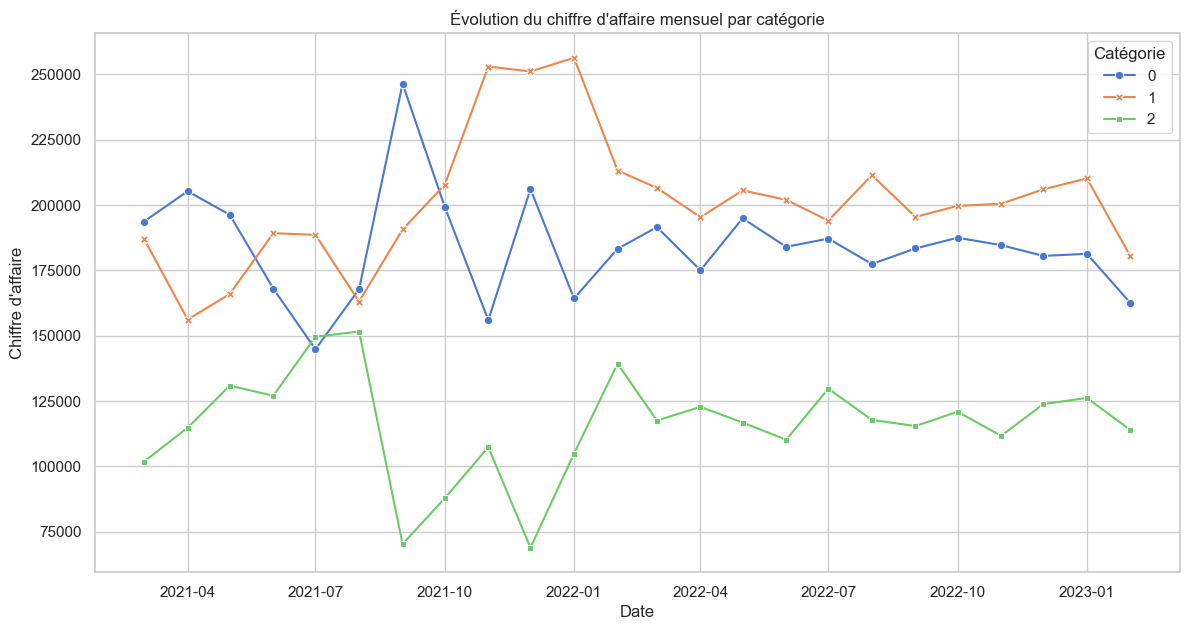

In [85]:
# Calculer le chiffre d'affaires par mois et par catégorie
monthly_revenue_by_category = df_transactions_products.groupby([df_transactions_products['date'].dt.to_period("M"), 'categ'])['price'].sum().unstack()

# Convertir l'index pour un affichage correct
monthly_revenue_by_category.index = monthly_revenue_by_category.index.to_timestamp()

# Tracer les graphiques avec Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_revenue_by_category, markers=True, dashes=False)

# Personnalisation du graphique
plt.title("Évolution du chiffre d'affaire mensuel par catégorie")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaire")
plt.legend(title='Catégorie')
plt.grid(True)
plt.show()


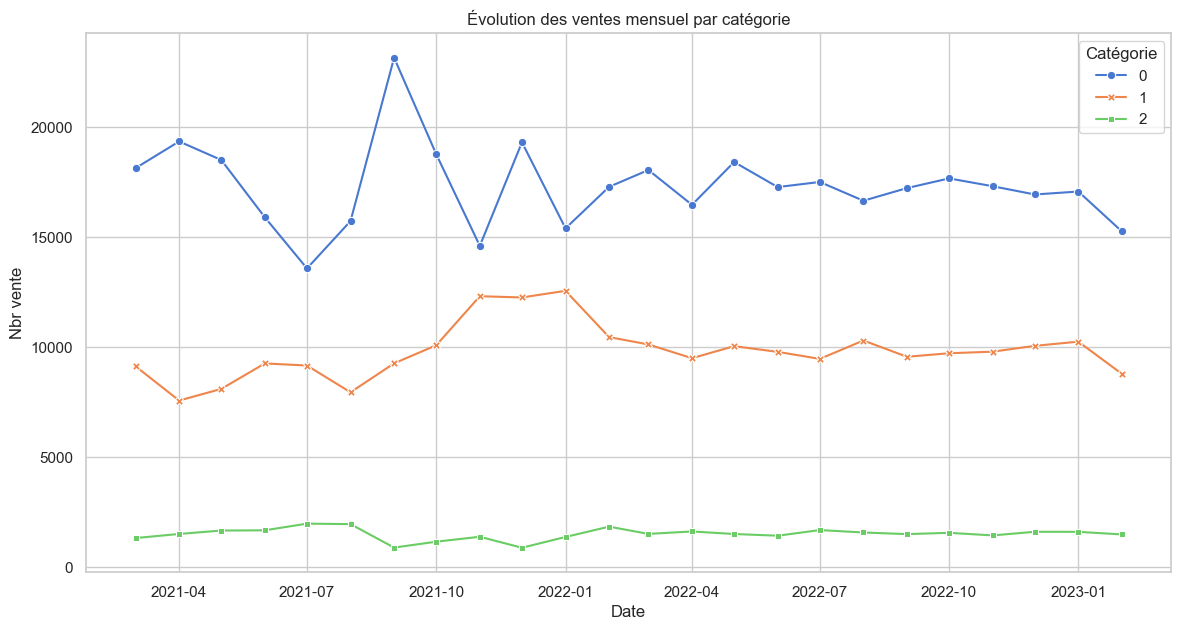

In [86]:
# Calculer le nombre de ventes par mois et par catégorie
monthly_sold_by_category = df_transactions_products.groupby([df_transactions_products['date'].dt.to_period("M"), 'categ'])['price'].count().unstack()

# Convertir l'index pour un affichage correct
monthly_sold_by_category.index = monthly_sold_by_category.index.to_timestamp()

# Tracer les graphiques avec Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sold_by_category, markers=True, dashes=False)

# Personnalisation du graphique
plt.title("Évolution des ventes mensuel par catégorie")
plt.xlabel("Date")
plt.ylabel("Nbr vente")
plt.legend(title='Catégorie')
plt.grid(True)
plt.show()

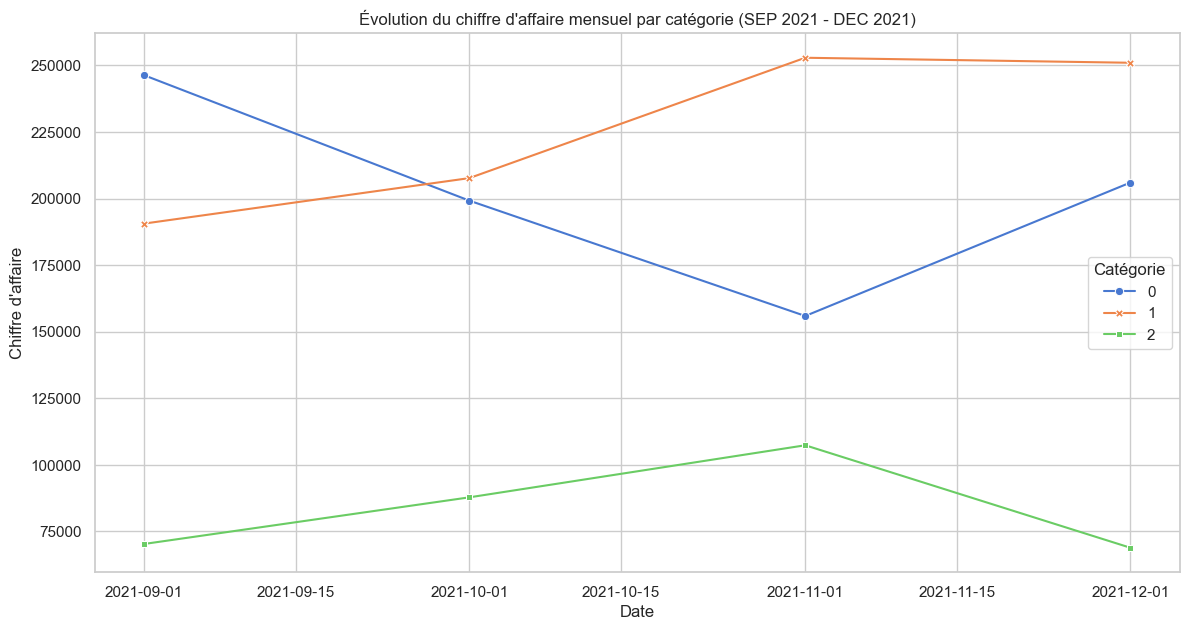

In [87]:
# Filtrer les données entre 2021-10 et 2021-11
filtered_data_r = monthly_revenue_by_category.loc['2021-09':'2021-12']

# Tracer les graphiques avec Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data_r, markers=True, dashes=False)

# Personnalisation du graphique
plt.title("Évolution du chiffre d'affaire mensuel par catégorie (SEP 2021 - DEC 2021)")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaire")
plt.legend(title='Catégorie')
plt.grid(True)
plt.show()

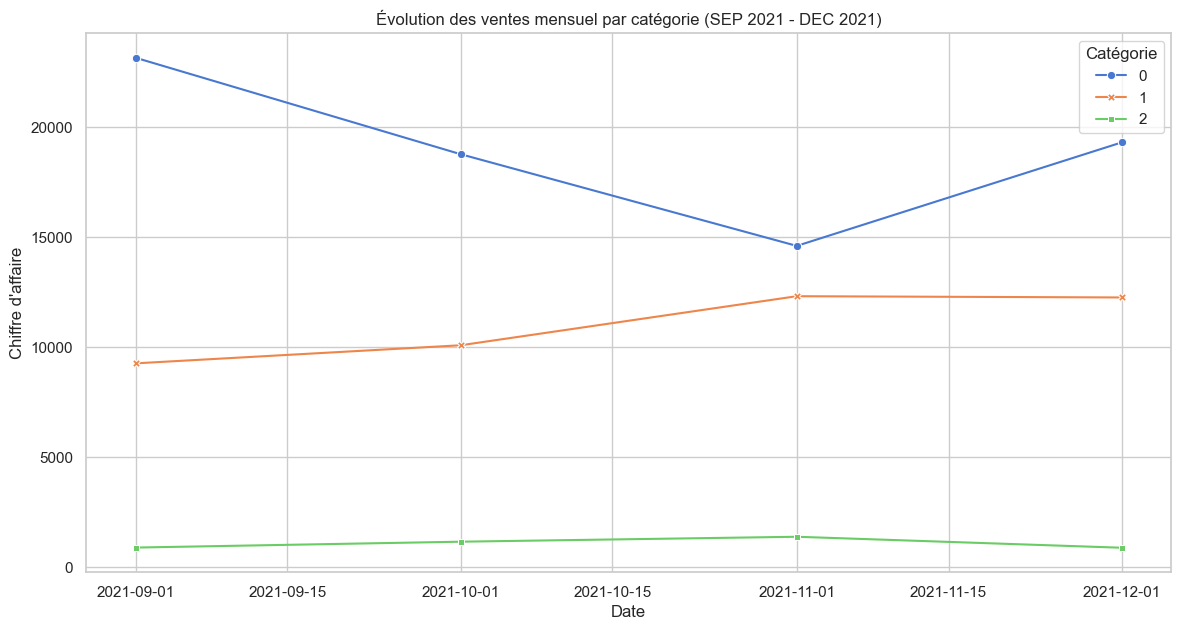

In [88]:
# Filtrer les données entre 2021-10 et 2021-11
filtered_data_s = monthly_sold_by_category.loc['2021-09':'2021-12']

# Tracer les graphiques avec Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data_s, markers=True, dashes=False)

# Personnalisation du graphique
plt.title("Évolution des ventes mensuel par catégorie (SEP 2021 - DEC 2021)")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaire")
plt.legend(title='Catégorie')
plt.grid(True)
plt.show()

Exclure le mois d'octobre 2021

In [89]:
# Exclure le mois d'octobre 2021
df_transactions_products = df_transactions_products[~((df_transactions_products['date'] >= '2021-09-01') & (df_transactions_products['date'] < '2021-11-01'))]

# S'assurer que la colonne 'date' est bien en index
df_transactions_products.set_index('date', inplace=True)

In [90]:
# Calculer le chiffre d'affaires par jour et ajouter une moyenne mobile
daily_revenue = df_transactions_products.groupby(df_transactions_products.index.date)['price'].sum()
daily_revenue = daily_revenue.to_frame(name='daily_revenue')
daily_revenue['7d_moving_avg'] = daily_revenue['daily_revenue'].rolling(window=7).mean()

# Afficher le DataFrame daily_revenue
daily_revenue.head()

,daily_revenue,7d_moving_avg
2021-03-01,16565.22,NaN
2021-03-02,15486.45,NaN
2021-03-03,15198.69,NaN
2021-03-04,15196.07,NaN
2021-03-05,17471.37,NaN


Verification du min du CA durant toute la periode

In [91]:
daily_revenue.min()

daily_revenue    13792.210000
7d_moving_avg    14653.025714
dtype: float64

In [92]:
date_min_value = daily_revenue.idxmin()
date_min_value

daily_revenue    2021-07-24
7d_moving_avg    2021-07-26
dtype: object

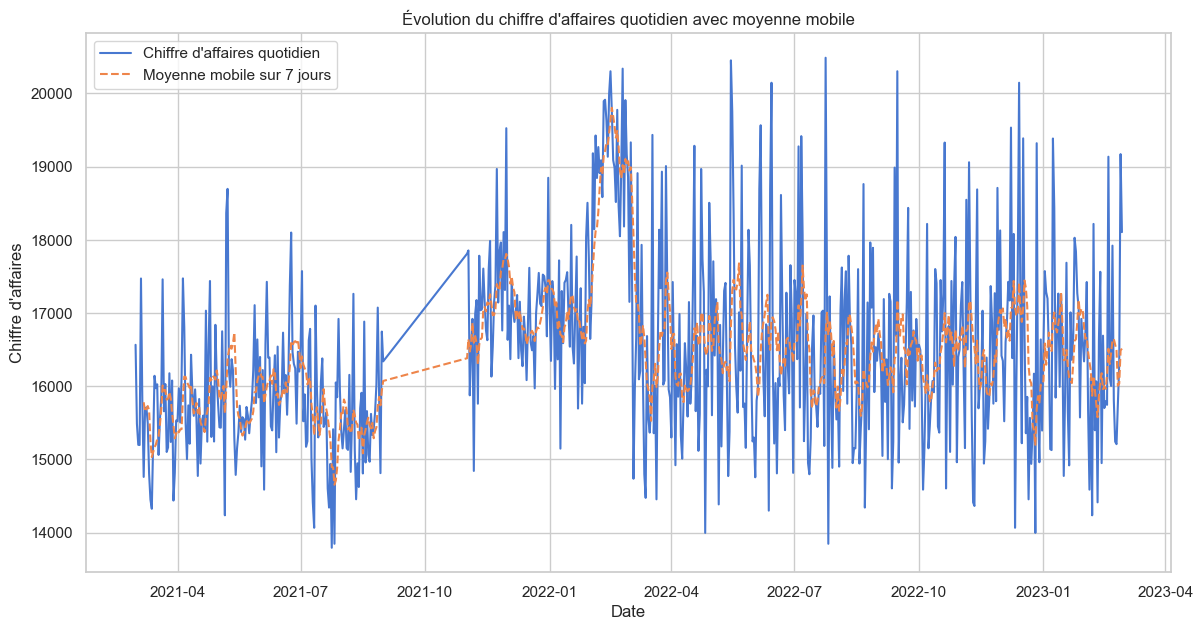

In [93]:
#Palette de couleurs
sns.set_theme(style='whitegrid', palette='muted')

# Tracer le graphique
plt.figure(figsize=(14, 7))
plt.plot(daily_revenue.index, daily_revenue['daily_revenue'], label="Chiffre d'affaires quotidien")
plt.plot(daily_revenue.index, daily_revenue['7d_moving_avg'], label='Moyenne mobile sur 7 jours', linestyle='--')
plt.title("Évolution du chiffre d'affaires quotidien avec moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - Nombre de clients par mois</h3>
</div>

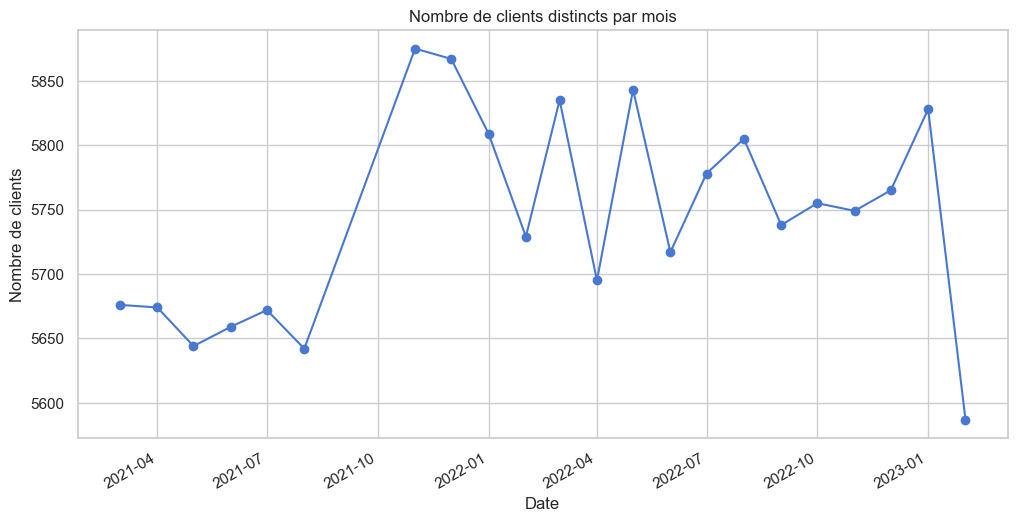

In [94]:
df_transactions_products.reset_index(inplace=True)
# Calculer le nombre de clients distincts par mois
clients_per_month = df_transactions_products.groupby(df_transactions_products['date'].dt.to_period("M"))['client_id'].nunique()

# Convertir l'index pour un affichage correct
clients_per_month.index = clients_per_month.index.to_timestamp()

# Tracer le graphique
plt.figure(figsize=(12, 6))
clients_per_month.plot(kind='line', marker='o')
plt.title("Nombre de clients distincts par mois")
plt.xlabel("Date")
plt.ylabel("Nombre de clients")
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4 - Nombre de transactions par mois</h3>
</div>

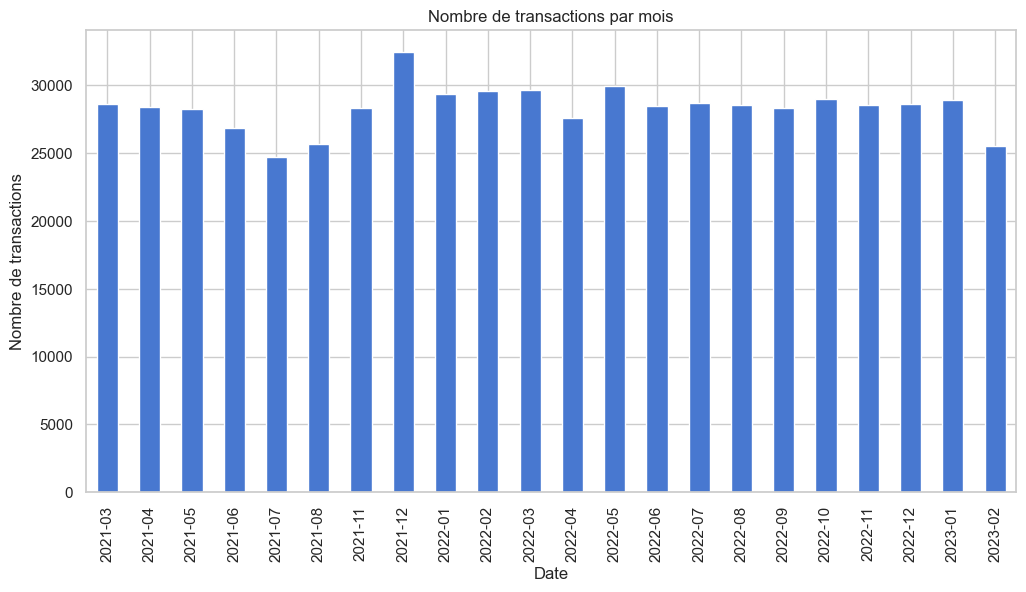

In [95]:
# Calculer le nombre de transactions par mois
transactions_per_month = df_transactions_products.groupby(df_transactions_products['date'].dt.to_period("M"))['session_id'].count()


# Tracer le graphique
plt.figure(figsize=(12, 6))
transactions_per_month.plot(kind='bar')
plt.title("Nombre de transactions par mois")
plt.xlabel("Date")
plt.ylabel("Nombre de transactions")
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.5 - Nombre de produits vendus par mois</h3>
</div>

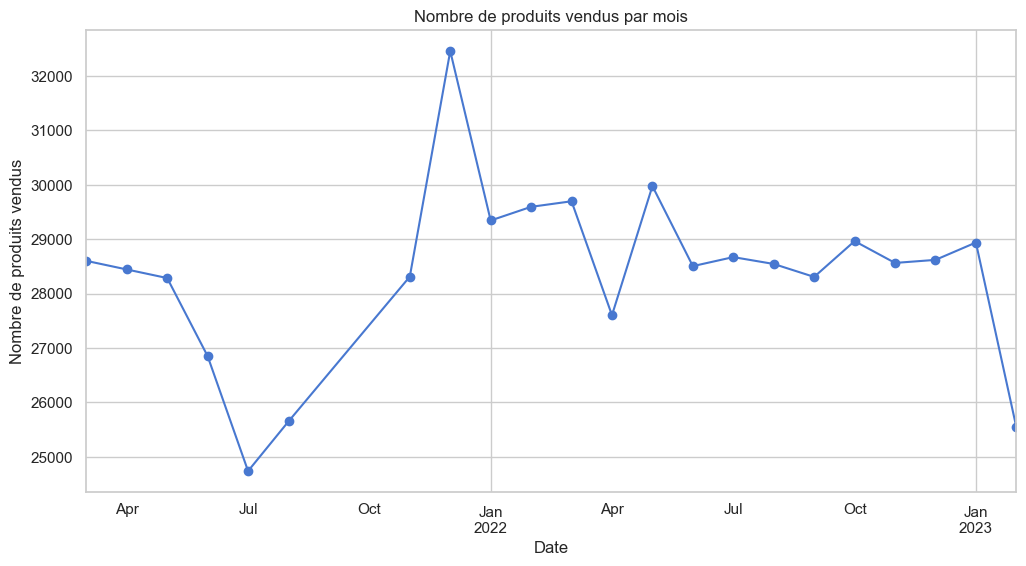

In [96]:
# Calculer le nombre de produits vendus par mois
products_sold_per_month = df_transactions_products.groupby(df_transactions_products['date'].dt.to_period("M"))['id_prod'].count()

# Tracer le graphique
plt.figure(figsize=(12, 6))
products_sold_per_month.plot(kind='line', marker='o')
plt.title("Nombre de produits vendus par mois")
plt.xlabel("Date")
plt.ylabel("Nombre de produits vendus")
plt.grid(True)
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4 - Zoom sur les références</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - Les Tops (produits les plus vendus)</h3>
</div>

In [97]:
# Identifier les 10 produits les plus vendus
top_products = df_transactions_products['id_prod'].value_counts().head(10)

# Afficher les résultats
print(top_products)


id_prod
1_369    2139
1_414    2084
1_417    2080
1_498    2041
1_425    2010
1_412    1874
1_406    1860
1_403    1859
1_407    1851
1_413    1842
Name: count, dtype: int64


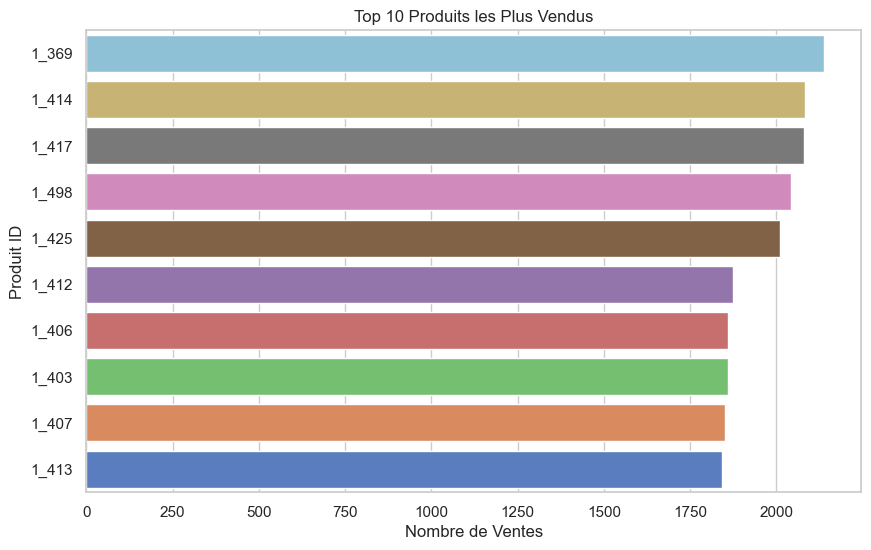

In [98]:
# Créer un graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index,hue=top_products.values,palette='muted',legend=False)
plt.title("Top 10 Produits les Plus Vendus")
plt.xlabel("Nombre de Ventes")
plt.ylabel("Produit ID")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Les Flops (produits les moins vendus)</h3>
</div>

In [99]:
# Compter le nombre d'achats par client
client_purchase_counts = df_transactions_products['client_id'].value_counts()

# Filtrer les clients avec un seul achat
single_purchase_clients = client_purchase_counts[client_purchase_counts == 1].index

# Extraire les transactions pour ces clients
flop_products = df_transactions_products[df_transactions_products['client_id'].isin(single_purchase_clients)]

In [100]:
flop_products_10 = client_purchase_counts.tail(10)
print(flop_products_10)

client_id
c_5080    1
c_4648    1
c_6292    1
c_4436    1
c_2226    1
c_3927    1
c_6879    1
c_12      1
c_4786    1
c_1624    1
Name: count, dtype: int64


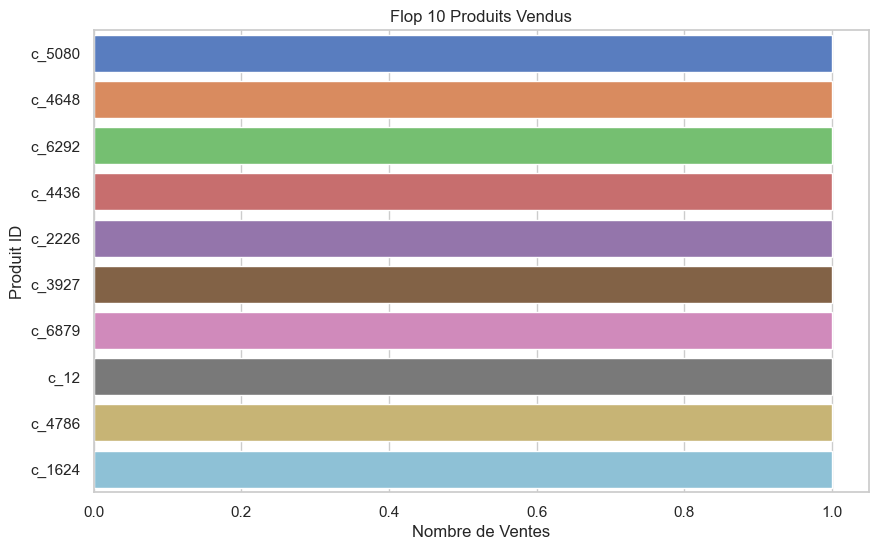

In [101]:
# Créer un graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=flop_products_10.values, y=flop_products_10.index,hue=flop_products_10.index,palette='muted',legend=False)
plt.title("Flop 10 Produits Vendus")
plt.xlabel("Nombre de Ventes")
plt.ylabel("Produit ID")
plt.show()

Afficher les produits les moins vendus (Sachant que les produits sans ventes ne sont pas pris en compte)

In [102]:
flop = flop_products['categ'].value_counts()
flop

categ
1    10
0     3
2     3
Name: count, dtype: int64

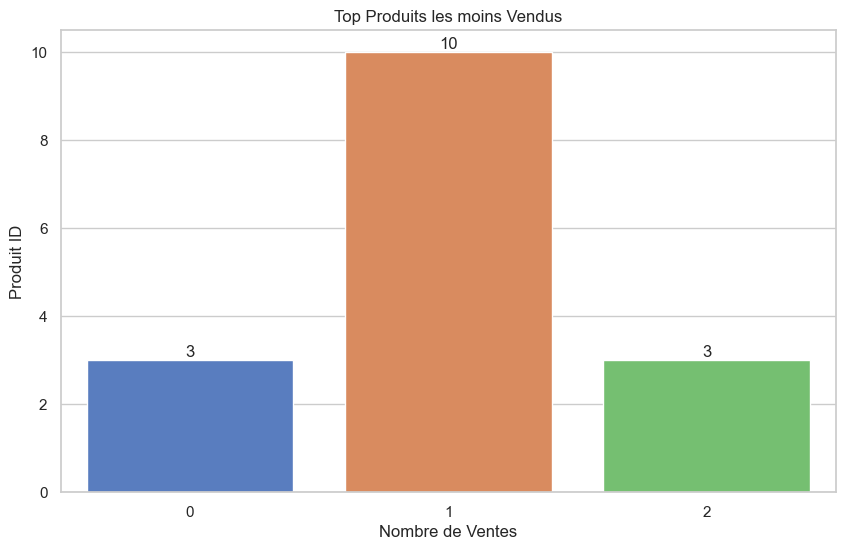

In [103]:

flop = flop_products['categ'].value_counts()

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x=flop.index, y=flop.values,hue=flop.index,hue_order=flop.index.sort_values(),order=flop.index.sort_values())

# Ajouter les scores sur les barres
for container in barplot.containers:
    barplot.bar_label(container)

# Ajouter les titres et les labels
plt.title("Top Produits les moins Vendus")
plt.xlabel("Nombre de Ventes")
plt.ylabel("Produit ID")

plt.show()

In [104]:
flop

categ
1    10
0     3
2     3
Name: count, dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - Répartition par catégorie</h3>
</div>

In [105]:
df_transactions_products

,date,id_prod,session_id,client_id,format_check,price,categ
0,2021-03-01 13:45:51.575117,0_0,s_282,c_5152,Valid,3.75,0
1,2021-03-02 06:42:55.351333,0_0,s_621,c_2917,Valid,3.75,0
2,2021-03-02 18:49:49.651862,0_0,s_852,c_3988,Valid,3.75,0
3,2021-03-02 21:57:33.862118,0_0,s_908,c_1004,Valid,3.75,0
4,2021-03-03 23:59:48.997483,0_0,s_1379,c_278,Valid,3.75,0
...,...,...,...,...,...,...,...
624193,2022-05-21 01:53:46.967570,2_99,s_211661,c_5828,Valid,84.99,2
624194,2022-07-21 01:53:46.967570,2_99,s_241374,c_5828,Valid,84.99,2
624195,2022-11-11 20:56:49.820935,2_99,s_296127,c_7135,Valid,84.99,2
624196,2022-12-11 20:56:49.820935,2_99,s_310606,c_7135,Valid,84.99,2


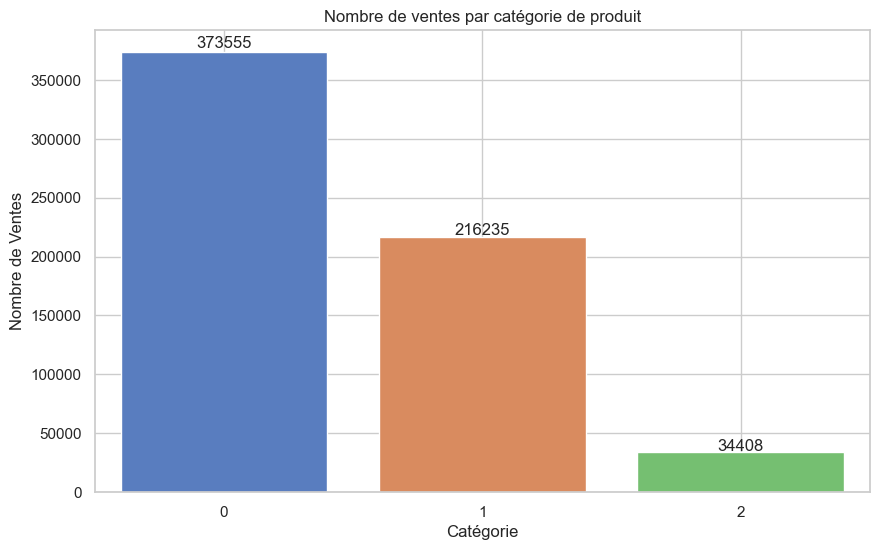

In [106]:
# Calculer le chiffre d'affaires par catégorie de produit
ventes_by_category = df_transactions_products.groupby('categ')['price'].count()

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=ventes_by_category.index, y=ventes_by_category.values,hue=ventes_by_category.index, palette='muted')

# Ajouter les valeurs sur les barres
for index, value in enumerate(ventes_by_category.values):
    plt.text(index, value + 0.01*value , f'{value}', ha='center')

# Définir le titre et les labels
plt.title("Nombre de ventes par catégorie de produit")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de Ventes")
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - Répartition du chiffre d'affaires pour les clients BtoB vs BtoC</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.5 - Courbe de Lorenz</h3>
</div>

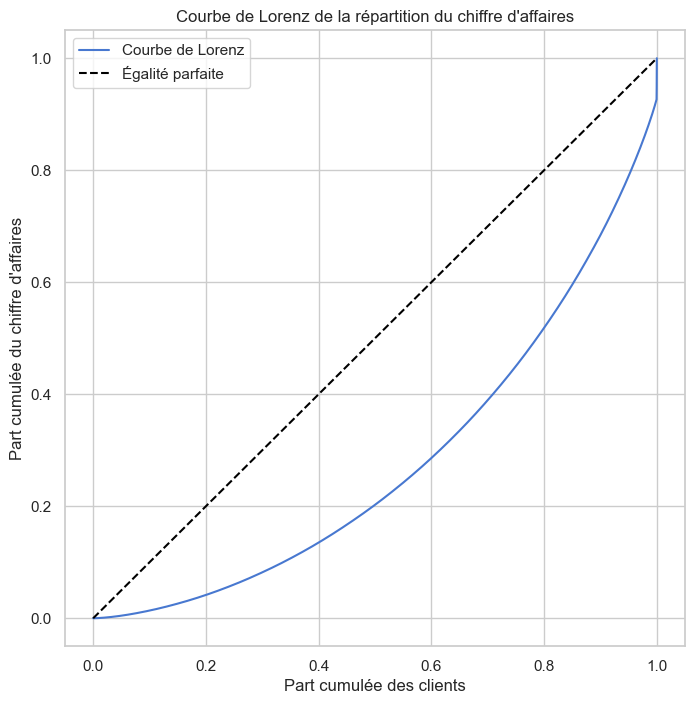

In [107]:
# Calcul du chiffre d'affaires par client
revenue_per_client

# Calculer la courbe de Lorenz
sorted_revenue = np.sort(revenue_per_client)
cumulative_revenue = np.cumsum(sorted_revenue)
lorenz_curve = cumulative_revenue / cumulative_revenue[-1]
lorenz_curve = np.insert(lorenz_curve, 0, 0)  # Ajouter un point à l'origine

# Tracer la courbe de Lorenz
plt.figure(figsize=(8, 8))
plt.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label="Courbe de Lorenz")
plt.plot([0, 1], [0, 1], '--', color='black', label="Égalité parfaite")
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée du chiffre d'affaires")
plt.title("Courbe de Lorenz de la répartition du chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()


In [108]:
# Calcul de l'indice de Gini pour le CA par client
revenue_per_client
gini_index_ca_btoc = gini_coefficient(revenue_per_client.values)

print(f"Indice de Gini, CA generé par chaque client: {gini_index_ca_btoc}")

Indice de Gini, CA generé par chaque client: (0.4418958799561552, "Représente un niveau modéré d'inégalité. Certains clients génèrent plus de chiffre d'affaires que d'autres, mais l'inégalité n'est pas extrême.")


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5 - Analyses complémentaires</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1 - Évolution du panier moyen par mois</h3>
</div>

In [109]:
monthly_revenue 

date
2021-03-01    482440.61
2021-04-01    476109.30
2021-05-01    492943.47
2021-06-01    484088.56
2021-07-01    482835.40
2021-08-01    482284.79
2021-09-01    507240.68
2021-10-01    494733.16
2021-11-01    516167.73
2021-12-01    525917.28
2022-01-01    525338.99
2022-02-01    535571.50
2022-03-01    515456.53
2022-04-01    492998.94
2022-05-01    517132.60
2022-06-01    496016.12
2022-07-01    510783.12
2022-08-01    506467.27
2022-09-01    494114.53
2022-10-01    507917.77
2022-11-01    496664.94
2022-12-01    510219.50
2023-01-01    517540.55
2023-02-01    456679.76
Freq: MS, Name: price, dtype: float64

In [110]:
transactions_per_month

date
2021-03    28601
2021-04    28443
2021-05    28285
2021-06    26850
2021-07    24738
2021-08    25650
2021-11    28311
2021-12    32457
2022-01    29343
2022-02    29594
2022-03    29696
2022-04    27602
2022-05    29975
2022-06    28504
2022-07    28670
2022-08    28544
2022-09    28306
2022-10    28964
2022-11    28563
2022-12    28619
2023-01    28938
2023-02    25545
Freq: M, Name: session_id, dtype: int64

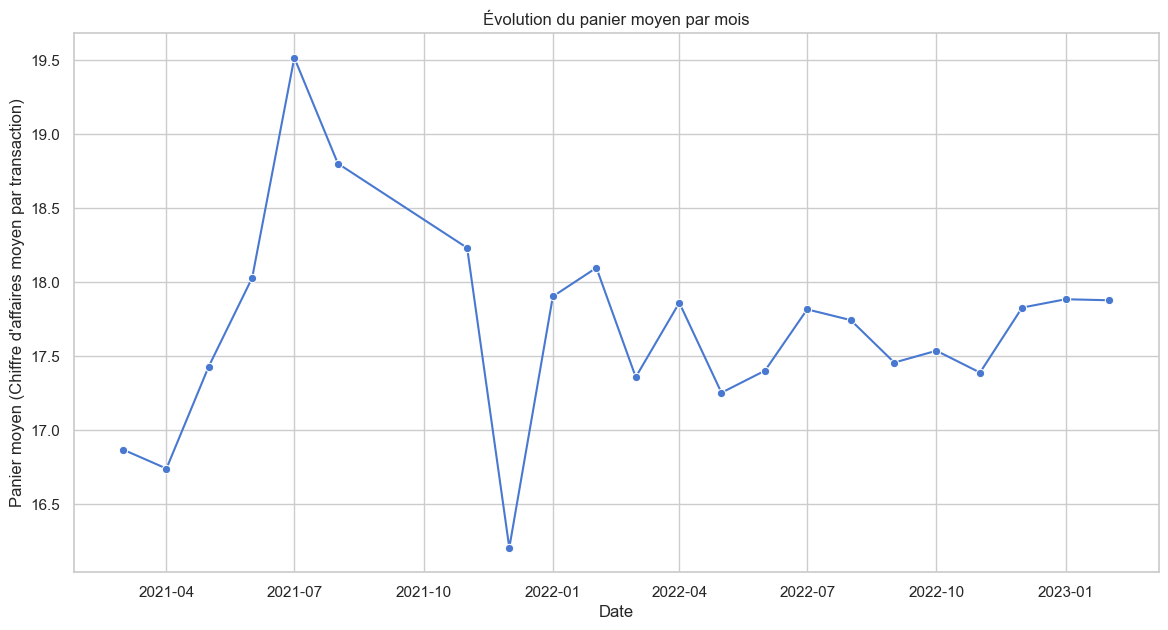

In [111]:
monthly_revenue.index = monthly_revenue.index.to_period("M")
monthly_revenue.index = monthly_revenue.index.to_timestamp()

transactions_per_month.index = transactions_per_month.index.to_timestamp()

# Calculer le panier moyen par mois
average_basket = monthly_revenue / transactions_per_month

# Tracer le graphique
plt.figure(figsize=(14, 7))
sns.lineplot(x=average_basket.index, y=average_basket, marker='o')
plt.title("Évolution du panier moyen par mois")
plt.xlabel("Date")
plt.ylabel("Panier moyen (Chiffre d'affaires moyen par transaction)")
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.3 - Analyse des clients fidèles - total achat</h3>
</div>

client_id
c_1609    23042
c_6714     8433
c_3454     6332
c_4958     4945
c_2140      363
c_7421      360
c_8026      357
c_2595      357
c_3263      355
c_760       351
Name: count, dtype: int64


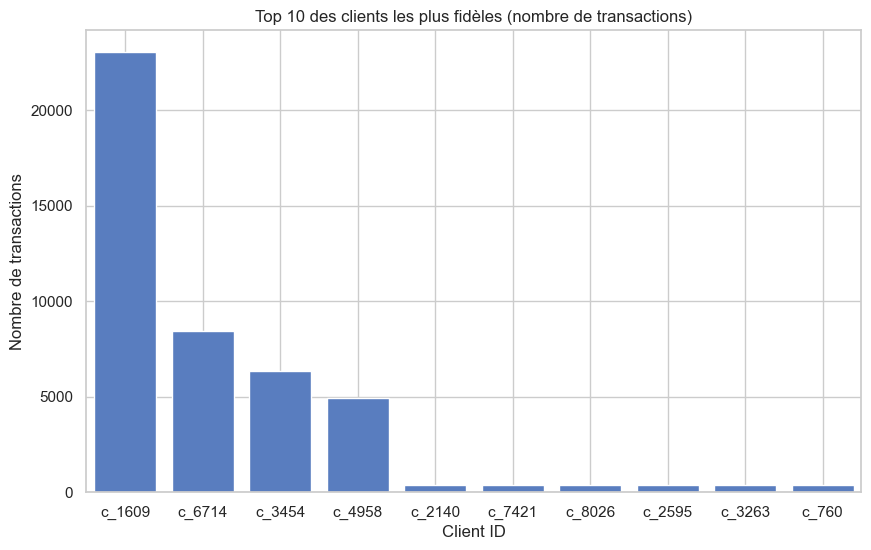

In [112]:
# Calculer le nombre de transactions par client
transactions_per_client = df_transactions_products['client_id'].value_counts()

# Identifier les 10 clients les plus fidèles
top_loyal_customers = transactions_per_client.head(10)

# Afficher les résultats
print(top_loyal_customers)

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=top_loyal_customers.index, y=top_loyal_customers.values)
plt.title("Top 10 des clients les plus fidèles (nombre de transactions)")
plt.xlabel("Client ID")
plt.ylabel("Nombre de transactions")
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.4 - Analyse des clients fidèles - total montant achat</h3>
</div>

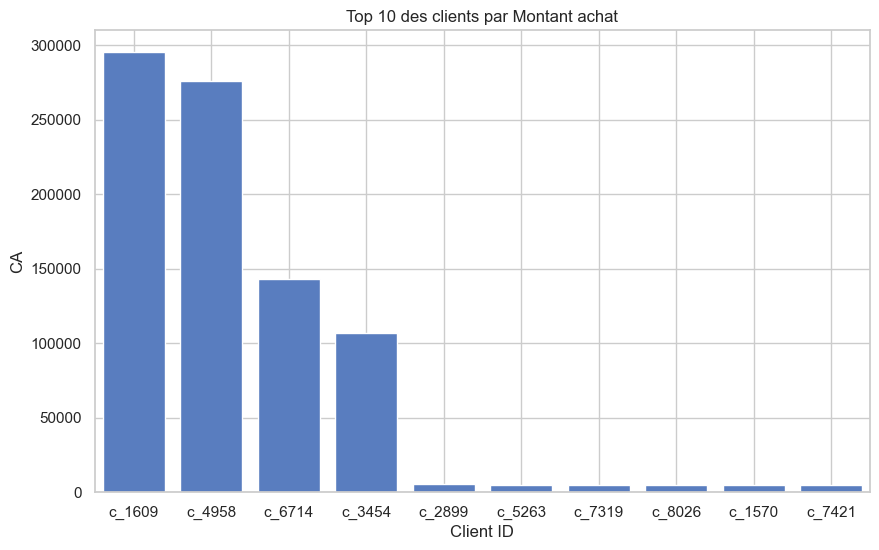

In [113]:
# Calculer du CA par client
clv = df_transactions_products.groupby('client_id')['price'].sum()

# Afficher les clients ayant la plus haute CLV
top_clv_customers = clv.sort_values(ascending=False).head(10)

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=top_clv_customers.index, y=top_clv_customers.values)
plt.title("Top 10 des clients par Montant achat")
plt.xlabel("Client ID")
plt.ylabel("CA")
plt.grid(True)
plt.show()


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">6 - Separation BtoB_BtoC</h2>
</div>

In [114]:
# Calculer la dépense totale de chaque client
total_spent_per_client = df_transactions_products.groupby('client_id')['price'].sum()

# Calculer la dépense moyenne de tous les clients
average_spent_all_clients = total_spent_per_client.mean()

# Trouver les clients qui dépensent 20 fois plus que la moyenne des autres clients
high_spenders = total_spent_per_client[total_spent_per_client > (average_spent_all_clients * 20)]

# Afficher les résultats
print("Clients qui dépensent 20 fois plus que la moyenne des autres clients :")
print(high_spenders)

Clients qui dépensent 20 fois plus que la moyenne des autres clients :
client_id
c_1609    295362.95
c_3454    106773.60
c_4958    275724.08
c_6714    142780.64
Name: price, dtype: float64


In [115]:
# Étape 1: Identifier les `BtoC` des "BtoB"
high_spender_ids = high_spenders.index

In [116]:

# Étape 2: Créer un DataFrame pour les "high spenders"
df_btob = df_transactions_products[df_transactions_products['client_id'].isin(high_spender_ids)]

# Étape 3: Créer un DataFrame pour les autres clients (exclure les "high spenders")
df_btoc = df_transactions_products[~df_transactions_products['client_id'].isin(high_spender_ids)]

# Afficher les deux DataFrames pour vérification
print("DataFrame des BtoB:",df_btob.sample())

print("\nDataFrame des BtoC:",df_btoc.sample())

DataFrame des BtoB:                             date id_prod session_id client_id format_check  \
58319 2022-04-30 21:02:34.380883  0_1196   s_201760    c_1609        Valid   

       price categ  
58319   6.51     0  

DataFrame des BtoC:                              date id_prod session_id client_id format_check  \
396638 2021-04-12 06:07:35.127858   1_264    s_19420     c_820        Valid   

        price categ  
396638  16.07     1  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.1 - Analyser BtoB</h3>
</div>

In [117]:
# Revenue total pour les clients B2B
total_revenue_btob = df_btob['price'].sum()

# Nombre de clients distincts pour les clients B2B
num_clients_btob = df_btob['client_id'].nunique()

# Nombre total d'achats pour les clients B2B
total_purchases_btob = df_btob['client_id'].count()

# Nombre moyen d'achats par client pour les clients B2B
avg_purchases_per_client_btob = total_purchases_btob / num_clients_btob if num_clients_btob else 0

# Valeur moyenne des achats pour les clients B2B
avg_order_value_btob = df_btob['price'].mean()

# Clients B2B (somme des dépenses par client)
clv_simplified_btob = df_btob.groupby('client_id')['price'].sum().mean()

print("Quelques KPI pour les clients B2B :\n")
print(f"Total CA: {total_revenue_btob:.2f}")
print(f"Nombre de clients: {num_clients_btob:.2f}")
print(f"Total Achat: {total_purchases_btob:.2f}")
print(f"CA moyen par client: {avg_purchases_per_client_btob:.2f}")
print(f"Panier Moyen: {avg_order_value_btob:.2f}")
print(f"Somme des dépenses par client: {clv_simplified_btob:.2f}")

Quelques KPI pour les clients B2B :

Total CA: 820641.27
Nombre de clients: 4.00
Total Achat: 42752.00
CA moyen par client: 10688.00
Panier Moyen: 19.20
Somme des dépenses par client: 205160.32


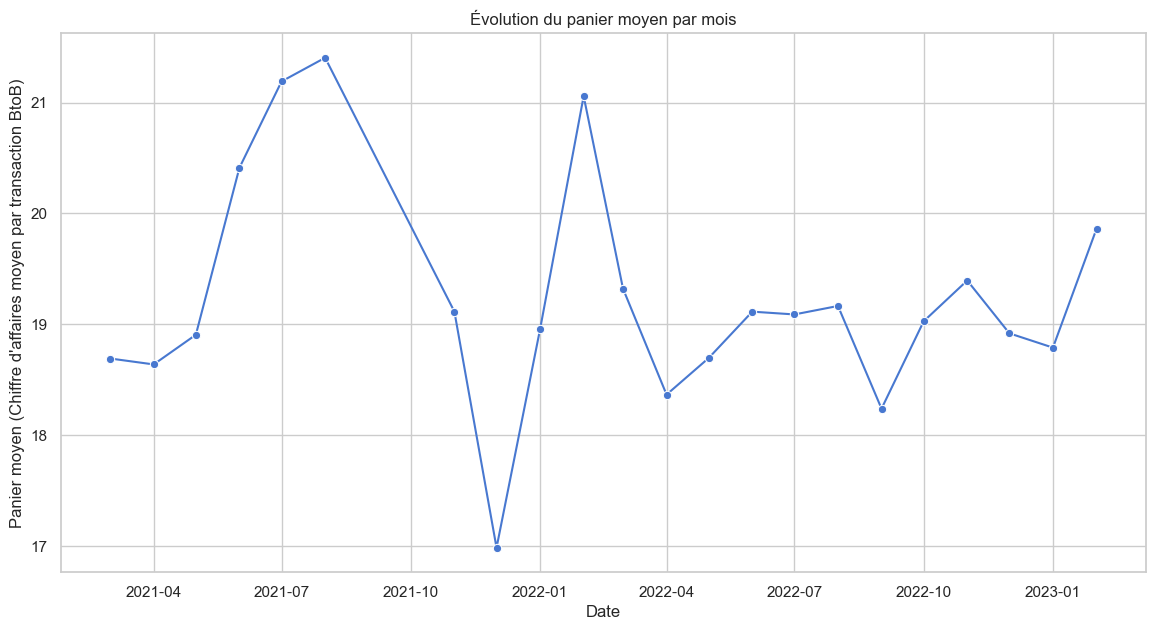

In [118]:
# Calculer le chiffre d'affaires total par mois
monthly_revenue_btob = df_btob.groupby(df_btob['date'].dt.to_period("M"))['price'].sum()

# Calculer le nombre de transactions par mois
monthly_transactions_btob = df_btob.groupby(df_btob['date'].dt.to_period("M"))['session_id'].count()

# Calculer le panier moyen par mois
average_basket_btob = monthly_revenue_btob / monthly_transactions_btob

# Tracer le graphique
plt.figure(figsize=(14, 7))
sns.lineplot(x=average_basket_btob.index.to_timestamp(), y=average_basket_btob, marker='o')
plt.title("Évolution du panier moyen par mois")
plt.xlabel("Date")
plt.ylabel("Panier moyen (Chiffre d'affaires moyen par transaction BtoB)")
plt.grid(True)
plt.show()

In [119]:
date_min_value = average_basket_btob.idxmin()
date_min_value

Period('2021-12', 'M')

In [120]:
# Exemple : Calcul de l'indice de Gini pour le CA par client
ca_df_btob = df_btob.groupby('client_id')['price'].sum()
gini_index_ca_btob = gini_coefficient(ca_df_btob.values)

print(f"Indice de Gini : CA generé par chaque client BtoB: {gini_index_ca_btob}")

Indice de Gini : CA generé par chaque client BtoB: (0.21285533507229037, "Généralement considéré comme un faible niveau d'inégalité. La distribution du chiffre d'affaires entre les clients est relativement égalitaire.")


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.2 - Analyser BtoC</h3>
</div>

In [121]:
# Revenue total pour les clients B2C
total_revenue_btoc = df_btoc['price'].sum()

# Nombre de clients distincts pour les clients B2C
num_clients_btoc = df_btoc['client_id'].nunique()

# Nombre total d'achats pour les clients B2C
total_purchases_btoc = df_btoc['client_id'].count()

# Nombre moyen d'achats par client pour les clients B2C
avg_purchases_per_client_btoc = total_purchases_btoc / num_clients_btoc if num_clients_btoc else 0

# Valeur moyenne des achats pour les clients B2C
avg_order_value_btoc = df_btoc['price'].mean()

# CLV simplifié pour les clients B2C (somme des dépenses par client)
clv_simplified_btoc = df_btoc.groupby('client_id')['price'].sum().mean()

print("Quelques KPI pour les clients B2C :\n")
print(f"Revenue total pour les clients B2C: {total_revenue_btoc:.2f}")
print(f"Nombre de clients: {num_clients_btoc:.2f}")
print(f"Nombre total d'achats: {total_purchases_btoc:.2f}")
print(f"Valeur moyenne des achats: {avg_purchases_per_client_btoc:.2f}")
print(f"Panier moyen: {avg_order_value_btoc:.2f}")
print(f"Somme des dépenses par client: {clv_simplified_btoc:.2f}")

Quelques KPI pour les clients B2C :

Revenue total pour les clients B2C: 10205047.99
Nombre de clients: 8589.00
Nombre total d'achats: 581446.00
Valeur moyenne des achats: 67.70
Panier moyen: 17.55
Somme des dépenses par client: 1188.15


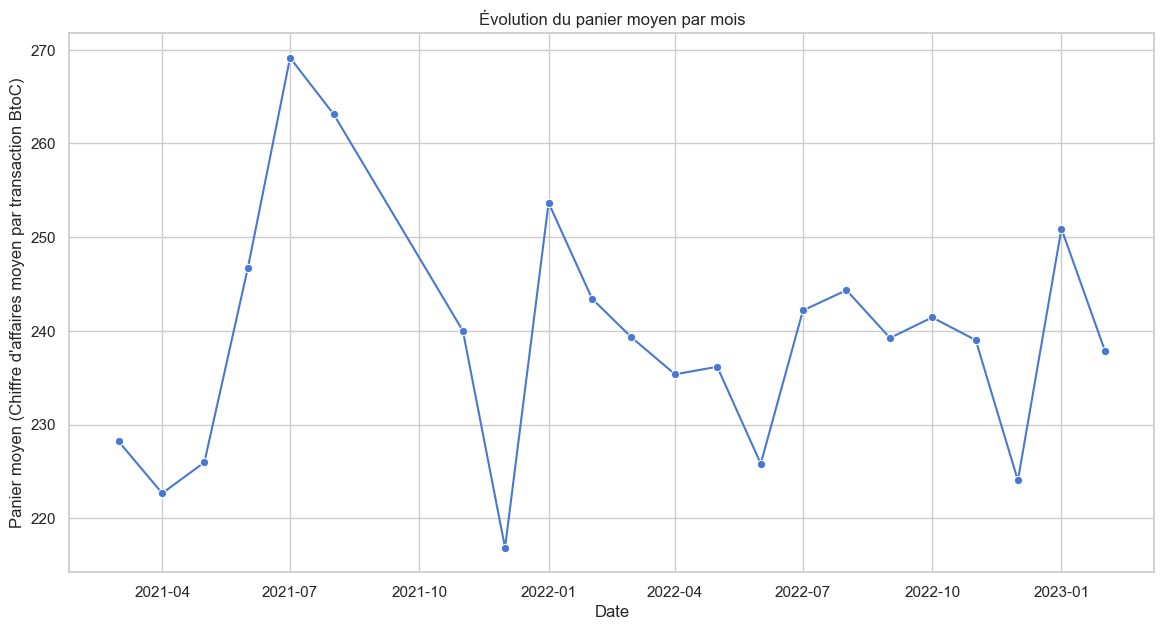

In [122]:
# Calculer le chiffre d'affaires total par mois
monthly_revenue_btoc = df_btoc.groupby(df_btoc['date'].dt.to_period("M"))['price'].sum()

# Calculer le nombre de transactions par mois
monthly_transactions_btoc = df_btoc.groupby(df_btob['date'].dt.to_period("M"))['session_id'].count()

# Calculer le panier moyen par mois
average_basket_btoc = monthly_revenue_btoc / monthly_transactions_btob

# Tracer le graphique
plt.figure(figsize=(14, 7))
sns.lineplot(x=average_basket_btoc.index.to_timestamp(), y=average_basket_btoc, marker='o')
plt.title("Évolution du panier moyen par mois")
plt.xlabel("Date")
plt.ylabel("Panier moyen (Chiffre d'affaires moyen par transaction BtoC)")
plt.grid(True)
plt.show()

In [123]:
# Calculer le total général pour chaque KPI
total_clients = num_clients_btob + num_clients_btoc
total_revenue = total_revenue_btob + total_revenue_btoc
total_purchases = total_purchases_btob + total_purchases_btoc
# Calculer les pourcentages
percentage_clients_btob = (num_clients_btob / total_clients) * 100
percentage_clients_btoc = (num_clients_btoc / total_clients) * 100

percentage_revenue_btob = (total_revenue_btob / total_revenue) * 100
percentage_revenue_btoc = (total_revenue_btoc / total_revenue) * 100

percentage_purchases_btob = (total_purchases_btob / total_purchases) * 100
percentage_purchases_btoc = (total_purchases_btoc / total_purchases) * 100

# Afficher les KPI en pourcentage
print("KPI en pourcentage pour B2B et B2C :\n")

print(f"Pourcentage de clients B2B : {percentage_clients_btob:.2f}%")
print(f"Pourcentage de clients B2C : {percentage_clients_btoc:.2f}%\n")

print(f"Pourcentage de CA genere B2B : {percentage_revenue_btob:.2f}%")
print(f"Pourcentage de CA genere B2C : {percentage_revenue_btoc:.2f}%\n")

print(f"Pourcentage du nombre total d'achats B2B : {percentage_purchases_btob:.2f}%")
print(f"Pourcentage du nombre total d'achats B2C : {percentage_purchases_btoc:.2f}%")

KPI en pourcentage pour B2B et B2C :

Pourcentage de clients B2B : 0.05%
Pourcentage de clients B2C : 99.95%

Pourcentage de CA genere B2B : 7.44%
Pourcentage de CA genere B2C : 92.56%

Pourcentage du nombre total d'achats B2B : 6.85%
Pourcentage du nombre total d'achats B2C : 93.15%


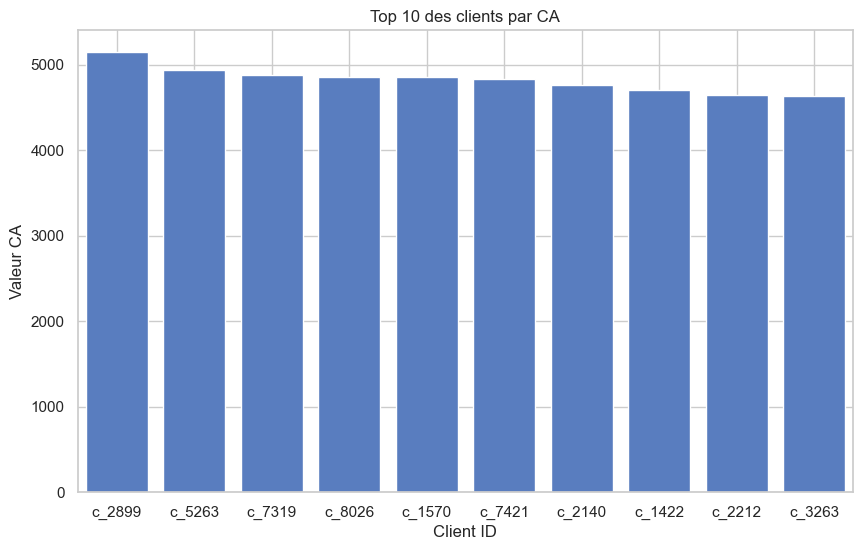

In [124]:
# Calculer le CA par client
ca_df_btoc = df_btoc.groupby('client_id')['price'].sum()

# Afficher le top 10
top_ca_df_btoc = ca_df_btoc.sort_values(ascending=False).head(10)

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ca_df_btoc.index, y=top_ca_df_btoc.values)
plt.title("Top 10 des clients par CA")
plt.xlabel("Client ID")
plt.ylabel("Valeur CA")
plt.grid(True)
plt.show()

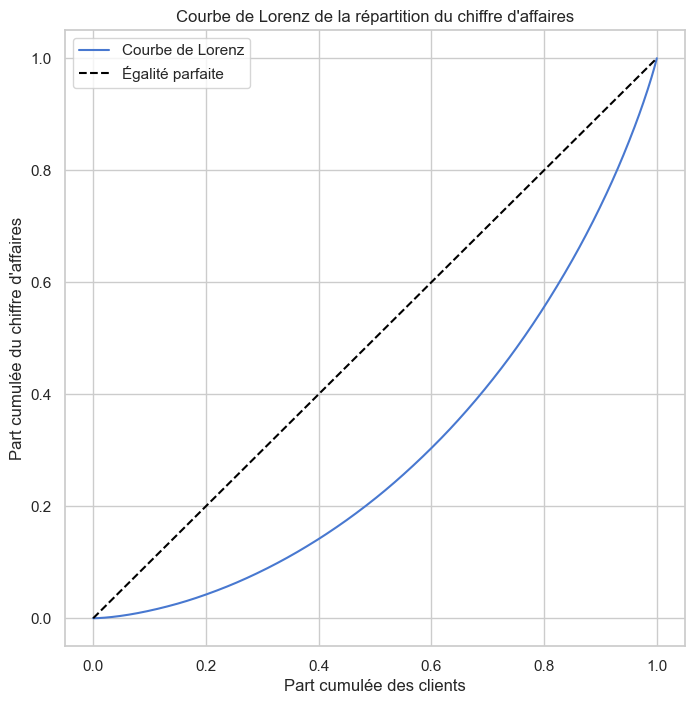

In [125]:
# Chiffre d'affaires généré par les  BtoC
ca_df_btoc

# Calculer la courbe de Lorenz
sorted_revenue_btoc = np.sort(ca_df_btoc)
cumulative_revenue_btoc = np.cumsum(sorted_revenue_btoc)
lorenz_curve_btoc = cumulative_revenue_btoc / cumulative_revenue_btoc[-1]
lorenz_curve_btoc = np.insert(lorenz_curve_btoc, 0, 0)  # Ajouter un point à l'origine

# Tracer la courbe de Lorenz
plt.figure(figsize=(8, 8))
plt.plot(np.linspace(0, 1, len(lorenz_curve_btoc)), lorenz_curve_btoc, label="Courbe de Lorenz")
plt.plot([0, 1], [0, 1], '--', color='black', label="Égalité parfaite")
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée du chiffre d'affaires")
plt.title("Courbe de Lorenz de la répartition du chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()

In [126]:
#Calcul de l'indice de Gini pour le CA par client
ca_df_btoc
gini_index_ca_btoc = gini_coefficient(ca_df_btoc.values)

print(f"Indice de Gini, CA generé par chaque client BtoC: {gini_index_ca_btoc}")

Indice de Gini, CA generé par chaque client BtoC: (0.40456196270252476, "Représente un niveau modéré d'inégalité. Certains clients génèrent plus de chiffre d'affaires que d'autres, mais l'inégalité n'est pas extrême.")


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.6 - Analyser l'Heure des Transactions</h3>
</div>

In [127]:
df_merge_btob = df_btob.merge(df_customers,how='outer', on='client_id',indicator='_merge')
df_merge_btob

,date,id_prod,session_id,client_id,format_check,price,categ,sex,age,_merge
0,NaT,NaN,NaN,c_1,NaN,NaN,NaN,m,69,right_only
1,NaT,NaN,NaN,c_10,NaN,NaN,NaN,m,68,right_only
2,NaT,NaN,NaN,c_100,NaN,NaN,NaN,m,32,right_only
3,NaT,NaN,NaN,c_1000,NaN,NaN,NaN,f,58,right_only
4,NaT,NaN,NaN,c_1001,NaN,NaN,NaN,m,42,right_only
...,...,...,...,...,...,...,...,...,...,...
51364,NaT,NaN,NaN,c_995,NaN,NaN,NaN,m,69,right_only
51365,NaT,NaN,NaN,c_996,NaN,NaN,NaN,f,54,right_only
51366,NaT,NaN,NaN,c_997,NaN,NaN,NaN,f,30,right_only
51367,NaT,NaN,NaN,c_998,NaN,NaN,NaN,m,23,right_only


In [128]:
df_merge_btoc = df_btoc.merge(df_customers,how='outer', on='client_id',indicator='_merge')
df_merge_btoc

,date,id_prod,session_id,client_id,format_check,price,categ,sex,age,_merge
0,2021-12-19 02:44:12.827475,0_1090,s_136532,c_1,Valid,13.78,0,m,69,both
1,2021-07-25 12:17:34.446678,0_1186,s_66947,c_1,Valid,12.30,0,m,69,both
2,2022-08-25 12:17:34.446678,0_1186,s_258252,c_1,Valid,12.30,0,m,69,both
3,2021-08-23 16:56:15.401655,0_1378,s_79696,c_1,Valid,13.96,0,m,69,both
4,2022-07-23 16:56:15.401655,0_1378,s_242617,c_1,Valid,13.96,0,m,69,both
...,...,...,...,...,...,...,...,...,...,...
581473,2022-01-19 09:10:14.900805,1_724,s_152063,c_999,Valid,16.94,1,m,60,both
581474,2021-11-21 17:40:50.856434,1_727,s_122996,c_999,Valid,16.99,1,m,60,both
581475,2022-05-21 17:40:50.856434,1_727,s_211960,c_999,Valid,16.99,1,m,60,both
581476,2022-07-21 17:40:50.856434,1_727,s_241673,c_999,Valid,16.99,1,m,60,both


In [129]:
df_merge_btob[df_merge_btob['_merge']=='right_only']

,date,id_prod,session_id,client_id,format_check,price,categ,sex,age,_merge
0,NaT,NaN,NaN,c_1,NaN,NaN,NaN,m,69,right_only
1,NaT,NaN,NaN,c_10,NaN,NaN,NaN,m,68,right_only
2,NaT,NaN,NaN,c_100,NaN,NaN,NaN,m,32,right_only
3,NaT,NaN,NaN,c_1000,NaN,NaN,NaN,f,58,right_only
4,NaT,NaN,NaN,c_1001,NaN,NaN,NaN,m,42,right_only
...,...,...,...,...,...,...,...,...,...,...
51364,NaT,NaN,NaN,c_995,NaN,NaN,NaN,m,69,right_only
51365,NaT,NaN,NaN,c_996,NaN,NaN,NaN,f,54,right_only
51366,NaT,NaN,NaN,c_997,NaN,NaN,NaN,f,30,right_only
51367,NaT,NaN,NaN,c_998,NaN,NaN,NaN,m,23,right_only


In [130]:
df_merge_btob['_merge'].value_counts()

_merge
both          42752
right_only     8617
left_only         0
Name: count, dtype: int64

In [131]:
# Calculer le pourcentage des données mises de côté dans le df BtoB
per_df_btob = (df_merge_btob['_merge'].value_counts()['right_only'] / df_merge_btob['_merge'].value_counts()['both']) * 100

print(f'Nous avons  {per_df_btob:.3f}% de données sans achat dont nous allons nous séparer pour le DF BtoB.')
# Clean (Pour l'instant on décide d'extraire ces données, en attendant la confirmation du client, cela va nous permettre de continuer notre analyse)
df_btob_nul = df_merge_btob[df_merge_btob["_merge"]=='right_only']
del df_btob_nul['_merge']
df_merge_btob = df_merge_btob[df_merge_btob["_merge"]=='both']
del df_merge_btob['_merge']

Nous avons  20.156% de données sans achat dont nous allons nous séparer pour le DF BtoB.


In [132]:
df_merge_btoc[df_merge_btoc['_merge']=='right_only']

,date,id_prod,session_id,client_id,format_check,price,categ,sex,age,_merge
16586,NaT,NaN,NaN,c_1223,NaN,NaN,NaN,m,61,right_only
45868,NaT,NaN,NaN,c_1609,NaN,NaN,NaN,m,44,right_only
62179,NaT,NaN,NaN,c_1828,NaN,NaN,NaN,m,20,right_only
128522,NaT,NaN,NaN,c_2706,NaN,NaN,NaN,f,57,right_only
150505,NaT,NaN,NaN,c_3017,NaN,NaN,NaN,f,32,right_only
172079,NaT,NaN,NaN,c_3308,NaN,NaN,NaN,f,33,right_only
173373,NaT,NaN,NaN,c_3327,NaN,NaN,NaN,m,48,right_only
181568,NaT,NaN,NaN,c_3443,NaN,NaN,NaN,m,65,right_only
182546,NaT,NaN,NaN,c_3454,NaN,NaN,NaN,m,55,right_only
188339,NaT,NaN,NaN,c_3526,NaN,NaN,NaN,m,68,right_only


In [133]:
df_merge_btoc['_merge'].value_counts()

_merge
both          581446
right_only        32
left_only          0
Name: count, dtype: int64

In [134]:
# Calculer le pourcentage des données mises de côté dans le df BtoB
per_df_btoc = (df_merge_btoc['_merge'].value_counts()['right_only'] / df_merge_btoc['_merge'].value_counts()['both']) * 100

print(f'Nous avons décidé de laisser de côté {per_df_btoc:.3f}% de données sans achat dont nous allons nous séparer pour le DF BtoC.')
# Clean (Pour l'instant on décide d'extraire ces données, en attendant la confirmation du client, cela va nous permettre de continuer notre analyse)
df_btoc_nul = df_merge_btoc[df_merge_btoc["_merge"]=='right_only']
del df_btoc_nul['_merge']
df_merge_btoc = df_merge_btoc[df_merge_btoc["_merge"]=='both']
del df_merge_btoc['_merge']

Nous avons décidé de laisser de côté 0.006% de données sans achat dont nous allons nous séparer pour le DF BtoC.


C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_20984\660581878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_btob['hour'] = df_merge_btob['date'].dt.hour


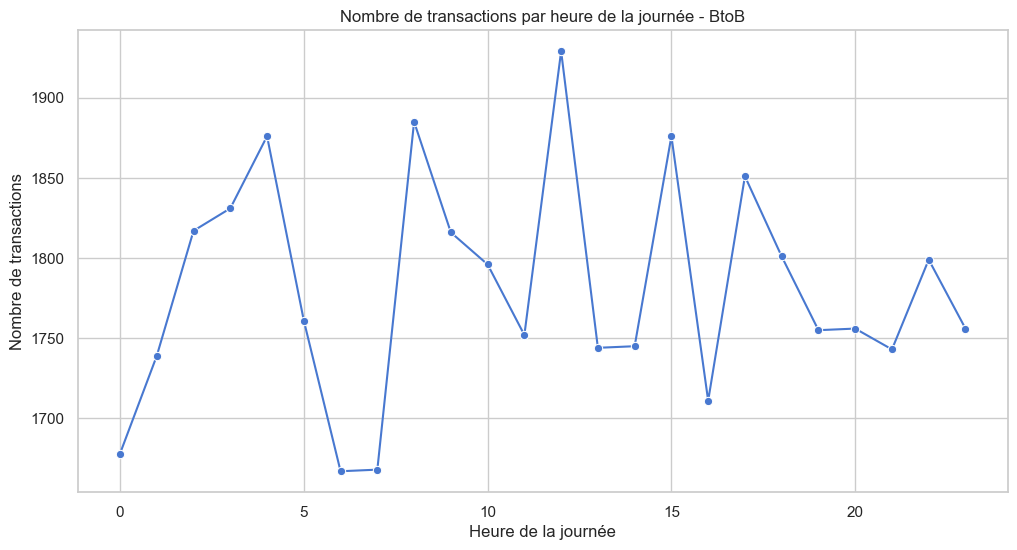

In [135]:
# Extraire l'heure de la journée
df_merge_btob['hour'] = df_merge_btob['date'].dt.hour

# Compter le nombre de transactions par heure
transactions_by_hour_btob = df_merge_btob.groupby('hour')['session_id'].count()

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.lineplot(x=transactions_by_hour_btob.index, y=transactions_by_hour_btob.values, marker='o')
plt.title("Nombre de transactions par heure de la journée - BtoB")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de transactions")
plt.grid(True)
plt.show()

C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_20984\1696214073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_btoc['hour'] = df_merge_btoc['date'].dt.hour


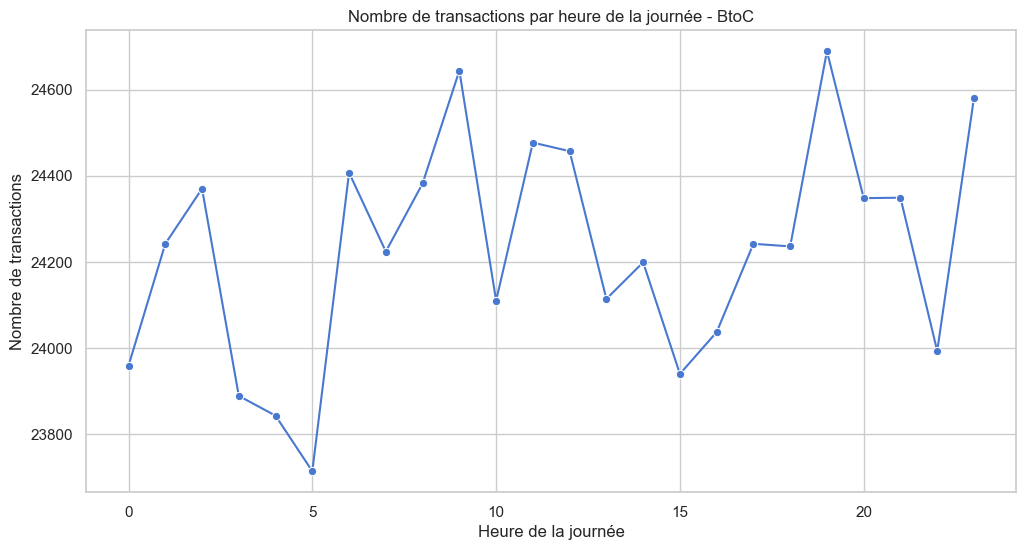

In [136]:
# Extraire l'heure de la journée
df_merge_btoc['hour'] = df_merge_btoc['date'].dt.hour

# Compter le nombre de transactions par heure
transactions_by_hour_btoc = df_merge_btoc.groupby('hour')['session_id'].count()

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.lineplot(x=transactions_by_hour_btoc.index, y=transactions_by_hour_btoc.values, marker='o')
plt.title("Nombre de transactions par heure de la journée - BtoC")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de transactions")
plt.grid(True)
plt.show()

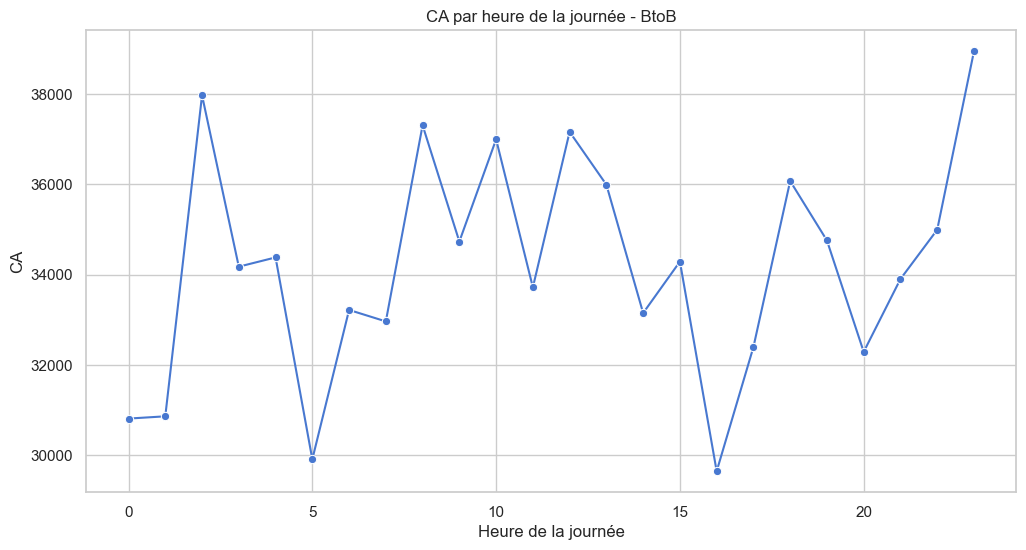

In [137]:
# Compter le nombre de transactions par heure
ca_by_hour_btob = df_merge_btob.groupby('hour')['price'].sum()

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.lineplot(x=ca_by_hour_btob.index, y=ca_by_hour_btob.values, marker='o')
plt.title("CA par heure de la journée - BtoB")
plt.xlabel("Heure de la journée")
plt.ylabel("CA")
plt.grid(True)
plt.show()

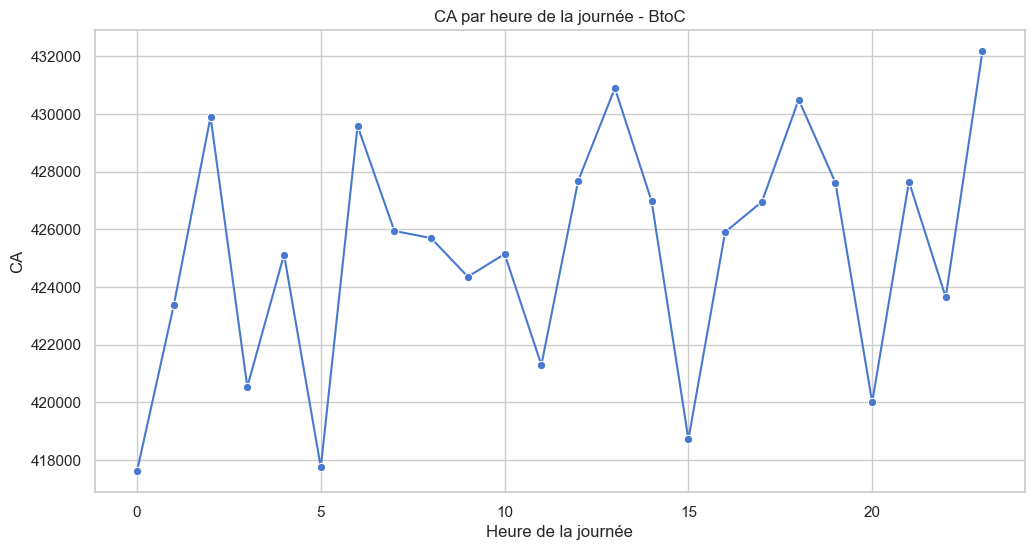

In [138]:
# Compter le nombre de transactions par heure
ca_by_hour_btoc = df_merge_btoc.groupby('hour')['price'].sum()

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.lineplot(x=ca_by_hour_btoc.index, y=ca_by_hour_btoc.values, marker='o')
plt.title("CA par heure de la journée - BtoC")
plt.xlabel("Heure de la journée")
plt.ylabel("CA")
plt.grid(True)
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">7 - Correlations</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">7.1 - Lien entre le genre d’un client et les catégories des livres achetés</h3>
</div>

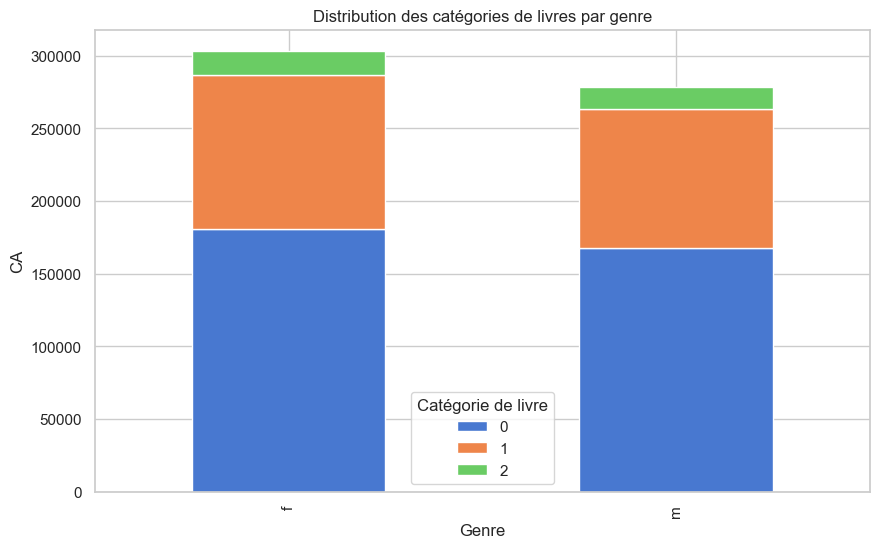

In [139]:
# Calculer la distribution des catégories de livres par genre
genre_category_distribution = pd.crosstab(df_merge_btoc['sex'], df_merge_btoc['categ'])

# Tracer un graphique en barres empilées
genre_category_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution des catégories de livres par genre")
plt.xlabel("Genre")
plt.ylabel("CA")
plt.legend(title="Catégorie de livre")
plt.show()

In [140]:
genre_category_distribution

categ,0,1,2
sex,,,
f,180877,106084,16007
m,167472,96050,14956


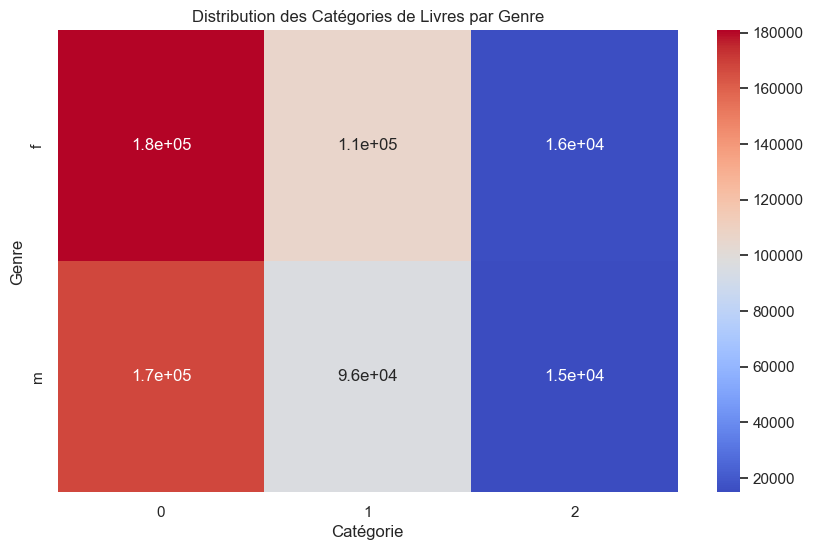

In [141]:
# Visualisation avec une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(genre_category_distribution, annot=True, cmap='coolwarm')
plt.title("Distribution des Catégories de Livres par Genre")
plt.xlabel("Catégorie")
plt.ylabel("Genre")
plt.show()

In [142]:
# Créer une table de contingence
contingency_table = pd.crosstab(df_merge_btoc['categ'], df_merge_btoc['sex'])

# Appliquer le test du Chi-carré
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")
print("Une valeur élevée de Chi2 indique que la différence entre les distributions observées et attendues est grande, ce qui suggère une dépendance entre les deux variables.")

Chi2: 18.145513729233887, p-value: 0.00011474975264593265
Une valeur élevée de Chi2 indique que la différence entre les distributions observées et attendues est grande, ce qui suggère une dépendance entre les deux variables.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">7.2 - Lien entre l'age des clients et le montant total des achats</h3>
</div>

In [143]:
# Regrouper les âges en tranches d'âge
bins = [18, 25, 35, 45, 55, 65, 90]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Créer une nouvelle colonne 'age_group' avec les tranches d'âge
df_merge_btoc['age_group'] = pd.cut(df_merge_btoc['age'], bins=bins, labels=labels, right=False)

# Vérifier la distribution des groupes d'âge
age_distribution = df_merge_btoc['age_group'].value_counts()

# Afficher la distribution des groupes d'âge
print(age_distribution)


age_group
35-44    184192
45-54    160178
25-34     70874
65+       67444
55-64     66303
18-24     30812
Name: count, dtype: int64


C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_20984\2236092773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_btoc['age_group'] = pd.cut(df_merge_btoc['age'], bins=bins, labels=labels, right=False)


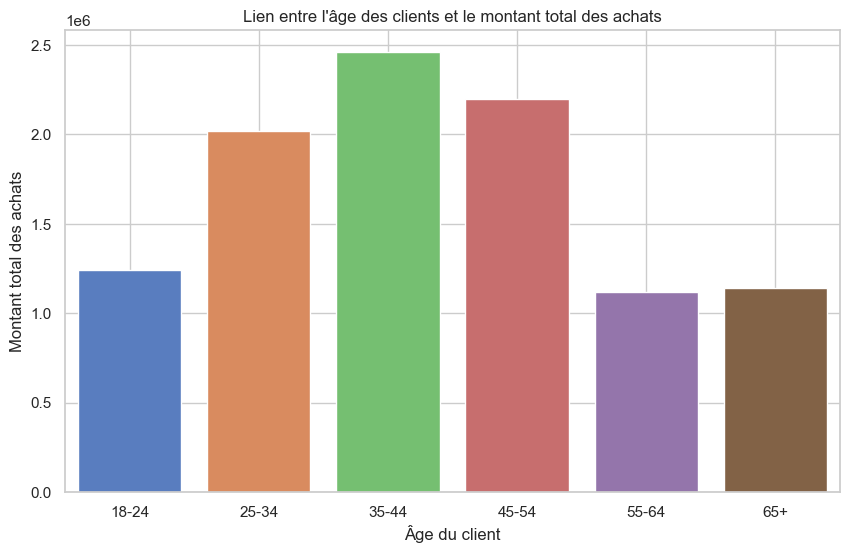

In [144]:
# Calculer le montant total des achats par groupe d'âge
age_achat_total = df_merge_btoc.groupby('age_group', observed=False)['price'].sum()

# Créer un DataFrame à partir de la série age_achat_total
df_age_achat_total = age_achat_total.reset_index()

# Tracer le graphique avec une palette de couleurs sans utiliser `hue`, en désactivant la légende
plt.figure(figsize=(10, 6))

sns.barplot(x='age_group', y='price', data=df_age_achat_total, palette='muted',hue="age_group")
plt.title("Lien entre l'âge des clients et le montant total des achats")
plt.xlabel("Âge du client")
plt.ylabel("Montant total des achats")
plt.grid(True)
plt.show()

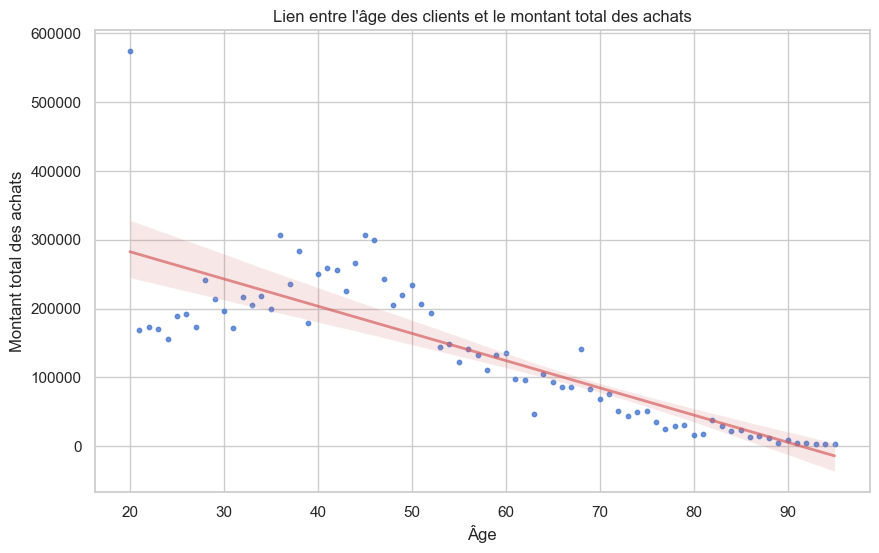

In [145]:
# Calculer le montant total des achats par client
age_revenue = df_merge_btoc.groupby('age')['price'].sum()
# Visualisation avec un scatter plot et une ligne de régression
plt.figure(figsize=(10, 6))
sns.regplot(x=age_revenue.index, y=age_revenue.values, scatter_kws={'s':10}, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title("Lien entre l'âge des clients et le montant total des achats")
plt.xlabel("Âge")
plt.ylabel("Montant total des achats")
plt.grid(True)
plt.show()

In [146]:
# Utiliser les données préparées : age_revenue contient l'âge des clients et leur montant total des achats
age = age_revenue.index.values.reshape(-1, 1)  # Âge (variables indépendantes)
revenue = age_revenue.values  # Montant total des achats (variable dépendante)

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle aux données
model.fit(age, revenue)

# Prédire les valeurs avec le modèle ajusté
predictions = model.predict(age)

# Calculer l'indice de régression (R²)
r_squared = r2_score(revenue, predictions)

print(f"Indice de Régression (R²): {r_squared:.4f}")
print("Cela indique une relation relativement forte entre l'âge des clients et le montant total des achats. Cela signifie que l'âge est un facteur significatif pour expliquer les variations dans le montant des achats.")


Indice de Régression (R²): 0.6968
Cela indique une relation relativement forte entre l'âge des clients et le montant total des achats. Cela signifie que l'âge est un facteur significatif pour expliquer les variations dans le montant des achats.


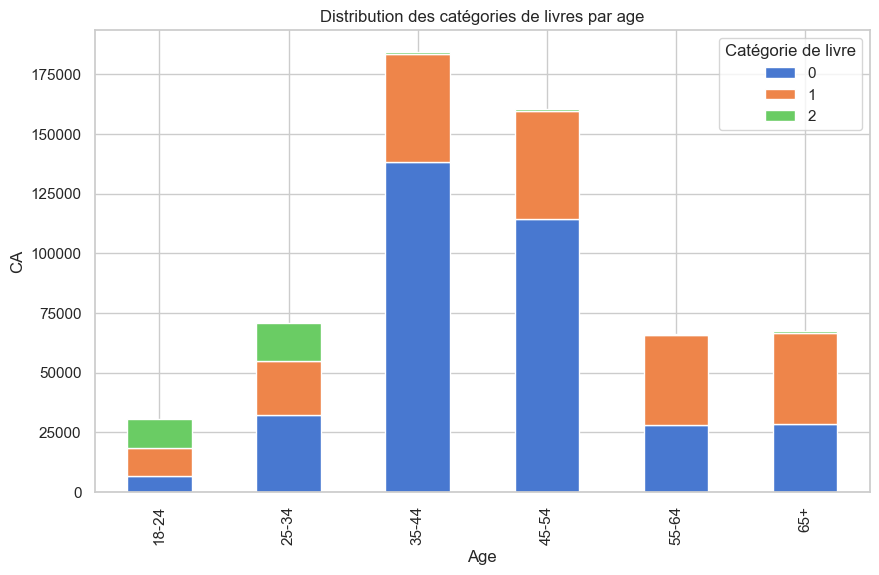

In [147]:
# Calculer la distribution des catégories de livres par groupe d age
age_category_distribution = pd.crosstab(df_merge_btoc['age_group'], df_merge_btoc['categ'])

# Tracer un graphique en barres empilées
age_category_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution des catégories de livres par age")
plt.xlabel("Age")
plt.ylabel("CA")
plt.legend(title="Catégorie de livre")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">7.3 - Transformation des données</h3>
</div>

Suite à la courbe de regression, nous avons décider de faire quelques transformations pour améliorer notre insight, pour cela nous allons : 
- Ignorer tous les clients de 20 ans

In [148]:
df_merge_btoc

,date,id_prod,session_id,client_id,format_check,price,categ,sex,age,hour,age_group
0,2021-12-19 02:44:12.827475,0_1090,s_136532,c_1,Valid,13.78,0,m,69,2,65+
1,2021-07-25 12:17:34.446678,0_1186,s_66947,c_1,Valid,12.30,0,m,69,12,65+
2,2022-08-25 12:17:34.446678,0_1186,s_258252,c_1,Valid,12.30,0,m,69,12,65+
3,2021-08-23 16:56:15.401655,0_1378,s_79696,c_1,Valid,13.96,0,m,69,16,65+
4,2022-07-23 16:56:15.401655,0_1378,s_242617,c_1,Valid,13.96,0,m,69,16,65+
...,...,...,...,...,...,...,...,...,...,...,...
581473,2022-01-19 09:10:14.900805,1_724,s_152063,c_999,Valid,16.94,1,m,60,9,55-64
581474,2021-11-21 17:40:50.856434,1_727,s_122996,c_999,Valid,16.99,1,m,60,17,55-64
581475,2022-05-21 17:40:50.856434,1_727,s_211960,c_999,Valid,16.99,1,m,60,17,55-64
581476,2022-07-21 17:40:50.856434,1_727,s_241673,c_999,Valid,16.99,1,m,60,17,55-64


In [149]:
df_merge_btoc = df_merge_btoc[df_merge_btoc['age']!=20]

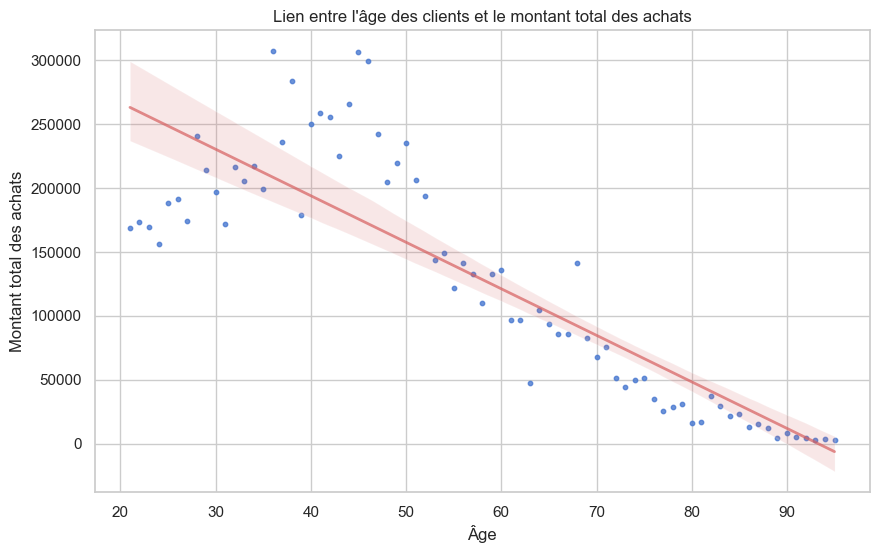

In [150]:
# Calculer le montant total des achats par client
age_revenue = df_merge_btoc.groupby('age')['price'].sum()
# Visualisation avec un scatter plot et une ligne de régression
plt.figure(figsize=(10, 6))
sns.regplot(x=age_revenue.index, y=age_revenue.values, scatter_kws={'s':10}, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title("Lien entre l'âge des clients et le montant total des achats")
plt.xlabel("Âge")
plt.ylabel("Montant total des achats")
plt.grid(True)
plt.show()

In [151]:
# Utiliser les données préparées : age_revenue contient l'âge des clients et leur montant total des achats
age = age_revenue.index.values.reshape(-1, 1)  # Âge (variables indépendantes)
revenue = age_revenue.values  # Montant total des achats (variable dépendante)

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle aux données
model.fit(age, revenue)

# Prédire les valeurs avec le modèle ajusté
predictions = model.predict(age)

# Calculer l'indice de régression (R²)
r_squared = r2_score(revenue, predictions)

print(f"Indice de Régression (R²): {r_squared:.4f}")
print("Cela indique une relation relativement forte entre l'âge des clients et le montant total des achats. Cela signifie que l'âge est un facteur significatif pour expliquer les variations dans le montant des achats.")


Indice de Régression (R²): 0.7449
Cela indique une relation relativement forte entre l'âge des clients et le montant total des achats. Cela signifie que l'âge est un facteur significatif pour expliquer les variations dans le montant des achats.


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">7.3.1 - Shpiro - AGE et Montant achat<h4>
</div>

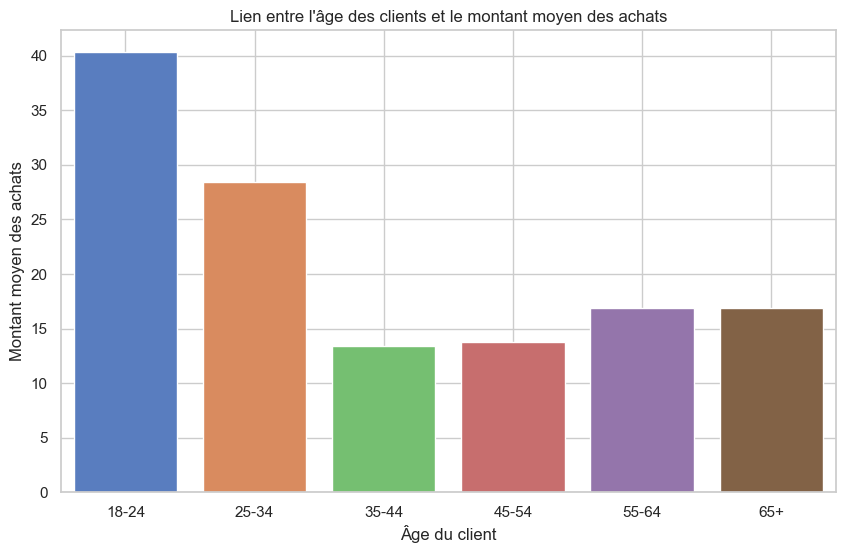

In [152]:
# Calculer le montant moyen des achats par client
age_achat_mean = df_merge_btoc.groupby('age_group',observed=False)['price'].mean()

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=age_achat_mean.index, y=age_achat_mean.values, palette='muted',hue=age_achat_mean.index)
plt.title("Lien entre l'âge des clients et le montant moyen des achats")
plt.xlabel("Âge du client")
plt.ylabel("Montant moyen des achats")
plt.grid(True)
plt.show()

In [153]:
# Vérifier la normalité de l'âge
age = df_merge_btoc.groupby('client_id')['age'].first()
stat_age, p_value_age = shapiro(age)
print(f"Shapiro-Wilk test pour l'âge: Stat={stat_age}, p-value={p_value_age}")

# Vérifier la normalité du montant total des achats par client
total_purchase_per_client = df_merge_btoc.groupby('client_id')['price'].sum()
stat_purchase, p_value_purchase = shapiro(total_purchase_per_client)
print(f"Shapiro-Wilk test pour le montant total des achats: Stat={stat_purchase}, p-value={p_value_purchase}")

# Appliquer la corrélation appropriée
if p_value_age > 0.05 and p_value_purchase > 0.05:
    # Utiliser Pearson si les deux sont normales
    correlation, p_value = pearsonr(age, total_purchase_per_client)
    print(f"Corrélation de Pearson: {correlation}, p-value: {p_value}")
else:
    # Utiliser Spearman si une des deux n'est pas normale
    correlation, p_value = spearmanr(age, total_purchase_per_client)
    print(f"Corrélation de Spearman: {correlation}, p-value: {p_value}")

Shapiro-Wilk test pour l'âge: Stat=0.9720380337458623, p-value=4.420000188950423e-37
Shapiro-Wilk test pour le montant total des achats: Stat=0.9029548303869115, p-value=8.666012928127564e-58
Corrélation de Spearman: -0.1894017695234304, p-value: 1.0152622613022704e-66


d:\Users\ZAPHAS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8153.
  res = hypotest_fun_out(*samples, **kwds)
d:\Users\ZAPHAS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8153.
  res = hypotest_fun_out(*samples, **kwds)


In [154]:
from scipy.stats import kstest

# Appliquer le test de Kolmogorov-Smirnov
ks_stat, p_value = kstest(df_merge_btoc['age'], 'norm', args=(np.mean(df_merge_btoc['age']), np.std(df_merge_btoc['age'])))

print(f"Statistique K-S : {ks_stat:.4f}")
print(f"Valeur-p : {p_value:.4f}")

Statistique K-S : 0.0873
Valeur-p : 0.0000


In [155]:
# Appliquer le test de Kolmogorov-Smirnov
ks_stat, p_value = kstest(df_merge_btoc['price'], 'norm', args=(np.mean(df_merge_btoc['price']), np.std(df_merge_btoc['price'])))
print(ks_stat)


print(f"Statistique K-S : {ks_stat:.4f}")
print(f"Valeur-p : {p_value:.4f}")

0.2210025723677016
Statistique K-S : 0.2210
Valeur-p : 0.0000


In [156]:
# Associer chaque client à son groupe d'âge
age_groups = df_merge_btoc.groupby('client_id')['age_group'].first()

# Calculer le prix total par client (ou vous pouvez utiliser la moyenne ou un autre indicateur)
price_per_client = df_merge_btoc.groupby('client_id')['price'].sum()

# Préparer les données pour le test de Kruskal-Wallis, en filtrant les groupes vides
grouped_data = [price_per_client[age_groups == age_group] for age_group in age_groups.unique() if not price_per_client[age_groups == age_group].empty]

# Appliquer le test de Kruskal-Wallis si tous les groupes sont valides
if len(grouped_data) > 1 and all(len(group) > 0 for group in grouped_data):
    kruskal_result = kruskal(*grouped_data)
    print(f"Statistique de Kruskal-Wallis: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")
else:
    print("Impossible d'appliquer le test de Kruskal-Wallis : un ou plusieurs groupes sont vides ou trop petits.")

# Affichage des résultats interprétés
if len(grouped_data) > 1 and all(len(group) > 0 for group in grouped_data):
    print("La statistique de Kruskal-Wallis est utilisée pour déterminer s'il existe une différence significative dans la variable 'price' entre les différents groupes d'âge.")
    print("Plus la statistique est élevée, plus il est probable que les distributions des groupes sont différentes les unes des autres.")
    print("La p-value indique si ces différences sont statistiquement significatives.")


Statistique de Kruskal-Wallis: 475.94181033227215, p-value: 1.2428915169143916e-100
La statistique de Kruskal-Wallis est utilisée pour déterminer s'il existe une différence significative dans la variable 'price' entre les différents groupes d'âge.
Plus la statistique est élevée, plus il est probable que les distributions des groupes sont différentes les unes des autres.
La p-value indique si ces différences sont statistiquement significatives.


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">7.3.2 - CONCLUSION<h4>
</div>

L'age et montant total des achats ne suivent pas une distribution normale, comme le montrent les résultats des tests de Shapiro-Wilk et de Kolmogorov-Smirnov. La corrélation de Spearman indique une corrélation faible mais significative entre l'âge et le montant total des achats. 

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">7.3.3 - Evolution du CA par groupe d'age<h4>
</div>

C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_20984\1507370261.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test = df_merge_btoc.groupby([df_merge_btoc['date'].dt.to_period("M"), 'age_group'])['price'].sum().unstack()


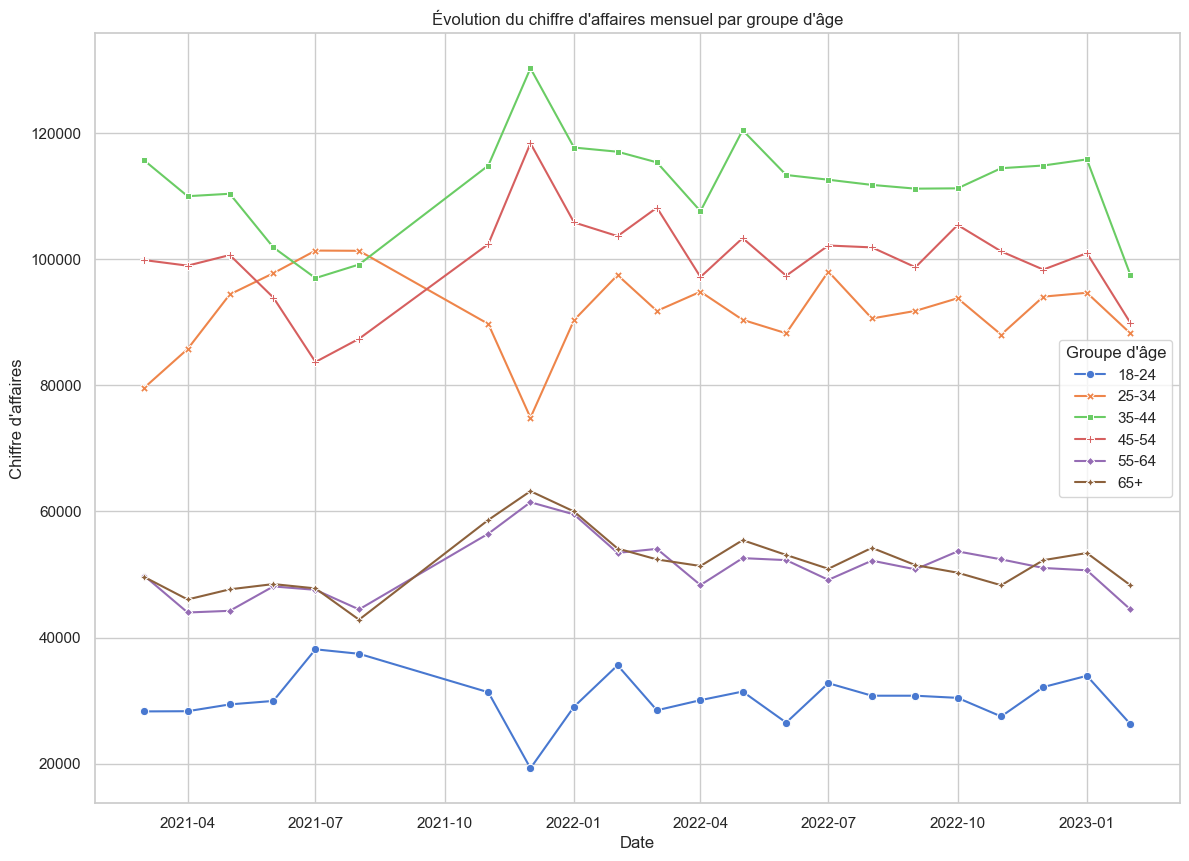

In [157]:
# Calculer la somme des prix par groupe d'âge et par date (mois)
test = df_merge_btoc.groupby([df_merge_btoc['date'].dt.to_period("M"), 'age_group'])['price'].sum().unstack()

# Convertir l'index pour un affichage correct
test.index = test.index.to_timestamp()

# Tracer les graphiques avec Seaborn
plt.figure(figsize=(14, 10))
sns.lineplot(data=test, markers=True, dashes=False)

# Personnalisation du graphique
plt.title("Évolution du chiffre d'affaires mensuel par groupe d'âge")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.legend(title='Groupe d\'âge')
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">7.4 - Lien entre l'age des clients et la fréquence d’achat</h3>
</div>

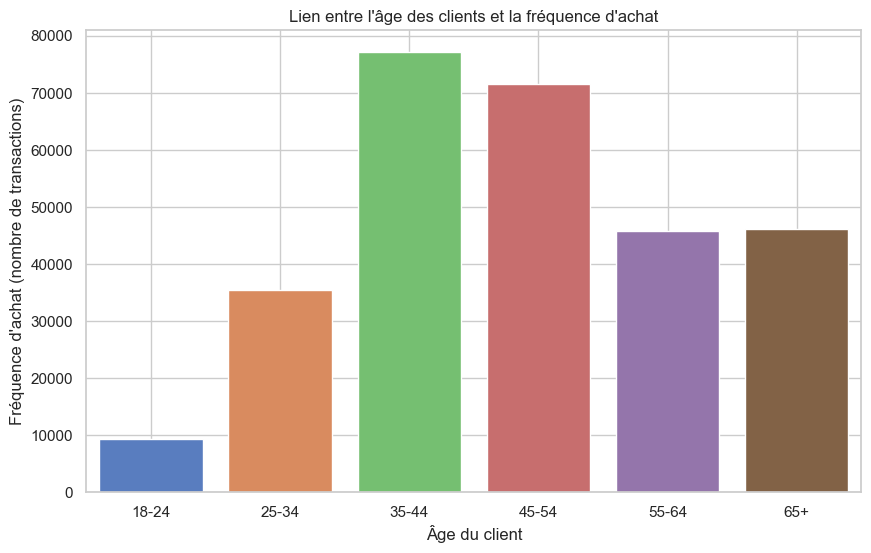

In [158]:
# Calculer la fréquence d'achat par client
age_frequency = df_merge_btoc.groupby('age_group',observed=True)['session_id'].nunique()

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=age_frequency.index, y=age_frequency.values,hue=age_frequency.index, palette='muted')
plt.title("Lien entre l'âge des clients et la fréquence d'achat")
plt.xlabel("Âge du client")
plt.ylabel("Fréquence d'achat (nombre de transactions)")
plt.grid(True)
plt.show()


In [159]:
from scipy.stats import kruskal

# Calculer la fréquence d'achat par client
purchase_frequency_per_client = df_merge_btoc.groupby('client_id')['session_id'].nunique()

# Associer chaque client à son groupe d'âge
age_groups = df_merge_btoc.groupby('client_id')['age_group'].first()

# Préparer les données pour le test de Kruskal-Wallis, en filtrant les groupes vides
grouped_data = [purchase_frequency_per_client[age_groups == age_group] for age_group in age_groups.unique() if not purchase_frequency_per_client[age_groups == age_group].empty]

# Appliquer le test de Kruskal-Wallis si tous les groupes sont valides
if len(grouped_data) > 1 and all(len(group) > 0 for group in grouped_data):
    kruskal_result = kruskal(*grouped_data)
    print(f"Statistique de Kruskal-Wallis: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")
else:
    print("Impossible d'appliquer le test de Kruskal-Wallis : un ou plusieurs groupes sont vides ou trop petits.")

# Calculer la fréquence d'achat totale par groupe d'âge
age_frequency = purchase_frequency_per_client.groupby(age_groups,observed=False).mean()

# Affichage des résultats interprétés
if len(grouped_data) > 1 and all(len(group) > 0 for group in grouped_data):
    print("La statistique de Kruskal-Wallis est utilisée pour déterminer s'il existe une différence significative dans la fréquence d'achat entre les différents groupes d'âge.")
    print("Plus la statistique est élevée, plus il est probable que les distributions des groupes sont différentes les unes des autres.")
    print("La p-value indique si ces différences sont statistiquement significatives.")


Statistique de Kruskal-Wallis: 936.1020209315458, p-value: 4.0852962867937425e-200
La statistique de Kruskal-Wallis est utilisée pour déterminer s'il existe une différence significative dans la fréquence d'achat entre les différents groupes d'âge.
Plus la statistique est élevée, plus il est probable que les distributions des groupes sont différentes les unes des autres.
La p-value indique si ces différences sont statistiquement significatives.


In [160]:
stat_purchase, p_value_purchase = shapiro(purchase_frequency_per_client)
print(f"Shapiro-Wilk test pour le montant total des achats: Stat={stat_purchase}, p-value={p_value_purchase}")

# Appliquer la corrélation appropriée
if p_value_age > 0.05 and p_value_purchase > 0.05:
    # Utiliser Pearson si les deux sont normales
    correlation, p_value = pearsonr(purchase_frequency_per_client, total_purchase_per_client)
    print(f"Corrélation de Pearson: {correlation}, p-value: {p_value}")
else:
    # Utiliser Spearman si une des deux n'est pas normale
    correlation, p_value = spearmanr(purchase_frequency_per_client, total_purchase_per_client)
    print(f"Corrélation de Spearman: {correlation}, p-value: {p_value}")

Shapiro-Wilk test pour le montant total des achats: Stat=0.8656318953163878, p-value=5.493667079115912e-64
Corrélation de Spearman: 0.8476495845122349, p-value: 0.0


d:\Users\ZAPHAS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8153.
  res = hypotest_fun_out(*samples, **kwds)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">7.5 - Lien entre l'age des clients et la taille du panier moyen</h3>
</div>

C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_20984\3785559068.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='price', data=age_basket_size2, errorbar=None, palette='muted')


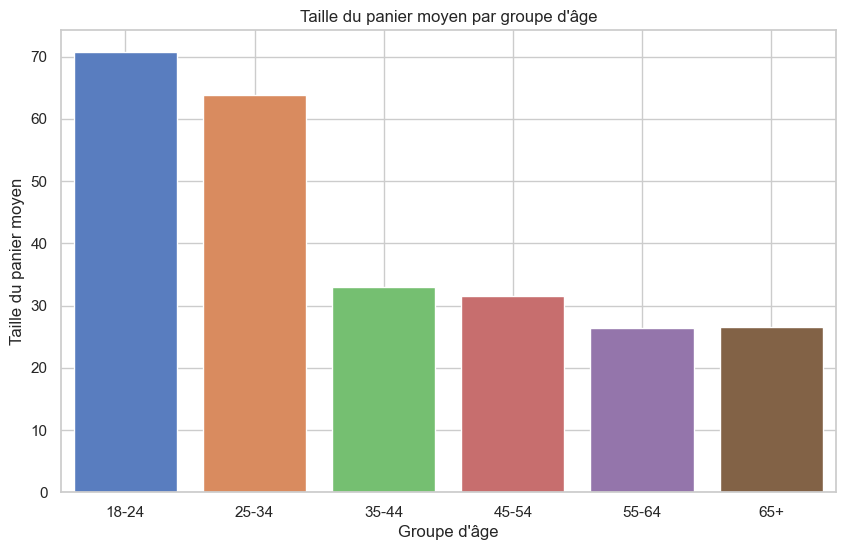

In [161]:
# Calculer la taille du panier moyen par client
age_basket_size2 = df_merge_btoc.groupby('client_id').agg({
    'age_group': 'first',  # Utilise le groupe d'âge
    'price': lambda x: x.sum() / df_merge_btoc.loc[x.index, 'session_id'].nunique()  # Calcul du panier moyen par client
})

# Visualisation avec un barplot par groupe d'âge
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='price', data=age_basket_size2, errorbar=None, palette='muted')
plt.title("Taille du panier moyen par groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Taille du panier moyen")
plt.grid(True)
plt.show()


In [162]:
# Calculer la taille du panier moyen par client
panier_moyen = df_merge_btoc.groupby('client_id').apply(lambda x: x['price'].sum() / x['session_id'].nunique())

# Vérifier la normalité de l'âge
age = df_merge_btoc.groupby('client_id')['age'].first()
stat_age, p_value_age = shapiro(age)
print(f"Shapiro-Wilk test pour l'âge: Stat={stat_age}, p-value={p_value_age}")

# Vérifier la normalité du montant total des achats par client
total_purchase_per_client = df_merge_btoc.groupby('client_id')['price'].sum()
stat_purchase, p_value_purchase = shapiro(panier_moyen)
print(f"Shapiro-Wilk test pour le montant total des achats: Stat={stat_purchase}, p-value={p_value_purchase}")

# Appliquer la corrélation appropriée
if p_value_age > 0.05 and p_value_purchase > 0.05:
    # Utiliser Pearson si les deux sont normales
    correlation, p_value = pearsonr(age, panier_moyen)
    print(f"Corrélation de Pearson: {correlation}, p-value: {p_value}")
else:
    # Utiliser Spearman si une des deux n'est pas normale
    correlation, p_value = spearmanr(age, panier_moyen)
    print(f"Corrélation de Spearman: {correlation}, p-value: {p_value}")

Shapiro-Wilk test pour l'âge: Stat=0.9720380337458623, p-value=4.420000188950423e-37
Shapiro-Wilk test pour le montant total des achats: Stat=0.7932828159537952, p-value=1.0852941430702183e-72
Corrélation de Spearman: -0.666535341913266, p-value: 0.0


C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_20984\2664161709.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  panier_moyen = df_merge_btoc.groupby('client_id').apply(lambda x: x['price'].sum() / x['session_id'].nunique())
d:\Users\ZAPHAS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8153.
  res = hypotest_fun_out(*samples, **kwds)
d:\Users\ZAPHAS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8153.
  res = hypotest_fun_out(*samples, **kwds)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">7.6 - Lien entre l'age des clients et la catégorie des livres achetés</h3>
</div>

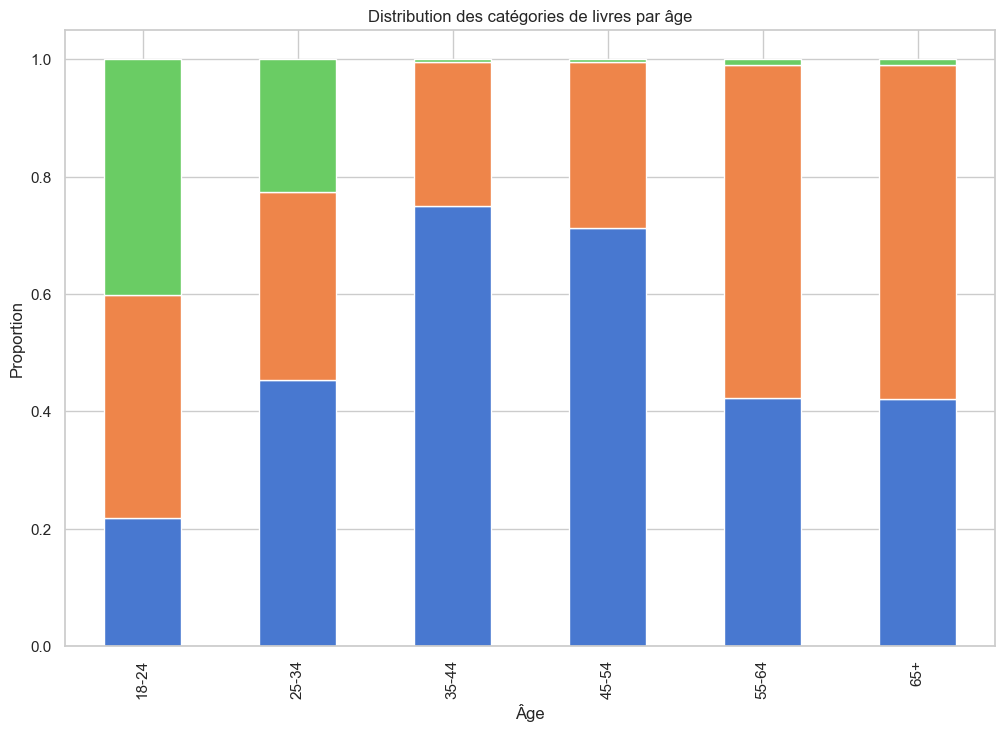

In [163]:
# Calculer la distribution des catégories de livres par âge
age_category_distribution = pd.crosstab(df_merge_btoc['age_group'], df_merge_btoc['categ'], normalize='index')


# Tracer un graphique en barres empilées
age_category_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), legend=False)
plt.title("Distribution des catégories de livres par âge")
plt.xlabel("Âge")
plt.ylabel("Proportion")
plt.show()


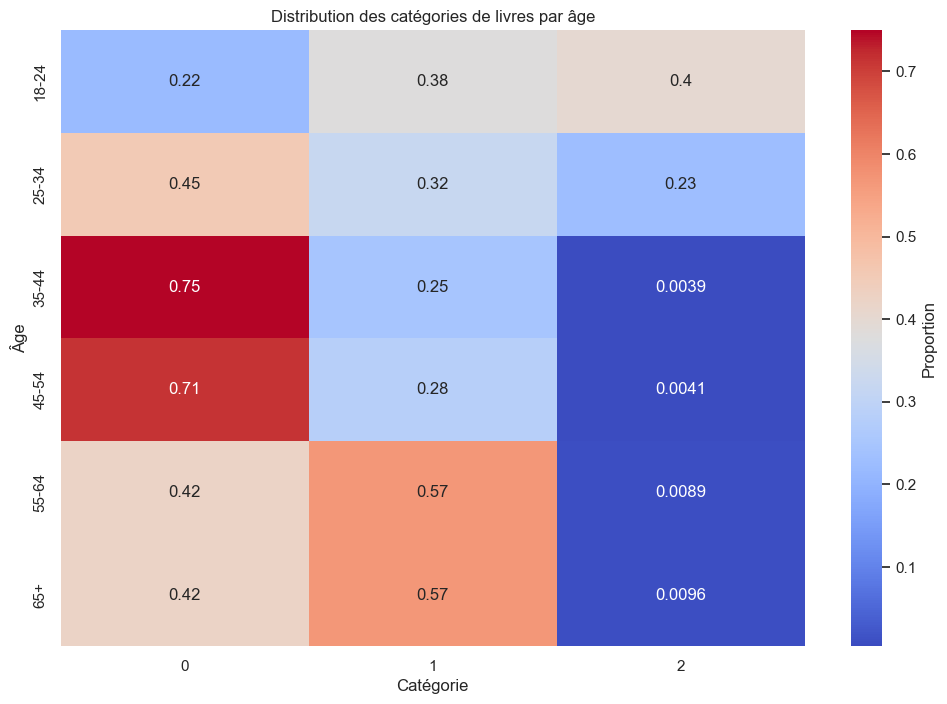

In [164]:
# Visualisation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(age_category_distribution,  annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion'})
plt.title("Distribution des catégories de livres par âge")
plt.xlabel("Catégorie")
plt.ylabel("Âge")
plt.show()


In [165]:
# Créer une table de contingence entre les groupes d'âge et les catégories de livres
contingency_table = pd.crosstab(df_merge_btoc['age_group'], df_merge_btoc['categ'])

# Appliquer le test du Chi-carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

# Interprétation des résultats
if p < 0.05:
    print("\nInterprétation:")
    print(f"Le test du Chi-carré montre une différence significative dans la distribution des catégories de livres entre les différents groupes d'âge (Chi2 = {chi2:.4f}).")
else:
    print("\nInterprétation:")
    print("Le test du Chi-carré ne montre pas de différence significative entre les groupes d'âge en termes de distribution des catégories de livres.")


Chi-Square Statistic: 165728.9914250561, p-value: 0.0

Interprétation:
Le test du Chi-carré montre une différence significative dans la distribution des catégories de livres entre les différents groupes d'âge (Chi2 = 165728.9914).


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">7.7 - Table de corrélation</h3>
</div>

In [166]:
df_merge_btoc

,date,id_prod,session_id,client_id,format_check,price,categ,sex,age,hour,age_group
0,2021-12-19 02:44:12.827475,0_1090,s_136532,c_1,Valid,13.78,0,m,69,2,65+
1,2021-07-25 12:17:34.446678,0_1186,s_66947,c_1,Valid,12.30,0,m,69,12,65+
2,2022-08-25 12:17:34.446678,0_1186,s_258252,c_1,Valid,12.30,0,m,69,12,65+
3,2021-08-23 16:56:15.401655,0_1378,s_79696,c_1,Valid,13.96,0,m,69,16,65+
4,2022-07-23 16:56:15.401655,0_1378,s_242617,c_1,Valid,13.96,0,m,69,16,65+
...,...,...,...,...,...,...,...,...,...,...,...
581473,2022-01-19 09:10:14.900805,1_724,s_152063,c_999,Valid,16.94,1,m,60,9,55-64
581474,2021-11-21 17:40:50.856434,1_727,s_122996,c_999,Valid,16.99,1,m,60,17,55-64
581475,2022-05-21 17:40:50.856434,1_727,s_211960,c_999,Valid,16.99,1,m,60,17,55-64
581476,2022-07-21 17:40:50.856434,1_727,s_241673,c_999,Valid,16.99,1,m,60,17,55-64


In [167]:
# Calculer le montant total des achats par client
total_purchase_per_client = df_merge_btoc.groupby('client_id')['price'].sum()

# Calculer la fréquence d'achat par client (nombre de transactions)
purchase_frequency_per_client = df_merge_btoc.groupby('client_id')['session_id'].nunique()

# Calculer la taille du panier moyen par client
panier_moyen = df_merge_btoc.groupby('client_id').apply(lambda x: x['price'].sum() / x['session_id'].nunique())

# Extraire la catégorie du client (si applicable)
categ = df_merge_btoc.groupby('client_id')['categ'].first()

age = df_merge_btoc.groupby('client_id')['age'].first()

# Créer un DataFrame avec toutes les variables
df_correlation = pd.DataFrame({
    'age': age,
    'total_achat': total_purchase_per_client,
    'frenquence_achat': purchase_frequency_per_client,
    'panier_moyen': panier_moyen,
    'categ': categ
})

# Afficher les premières lignes pour vérification
df_correlation.head()



C:\Users\ZAPHAS\AppData\Local\Temp\ipykernel_20984\2531393096.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  panier_moyen = df_merge_btoc.groupby('client_id').apply(lambda x: x['price'].sum() / x['session_id'].nunique())


,age,total_achat,frenquence_achat,panier_moyen,categ
client_id,,,,,
c_1,69,530.21,30,17.673667,0
c_10,68,1241.86,30,41.395333,0
c_100,32,254.85,5,50.970000,0
c_1000,58,2111.03,86,24.546860,0
c_1001,42,1594.95,38,41.972368,0


In [168]:
# Calculer la matrice de corrélation
correlation_matrix = df_correlation.corr(method= 'spearman')

# Afficher la matrice de corrélation
print(correlation_matrix)


                       age  total_achat  frenquence_achat  panier_moyen  \
age               1.000000    -0.189402          0.176295     -0.666535   
total_achat      -0.189402     1.000000          0.847650      0.220770   
frenquence_achat  0.176295     0.847650          1.000000     -0.270738   
panier_moyen     -0.666535     0.220770         -0.270738      1.000000   
categ            -0.334704    -0.097165         -0.288061      0.318386   

                     categ  
age              -0.334704  
total_achat      -0.097165  
frenquence_achat -0.288061  
panier_moyen      0.318386  
categ             1.000000  


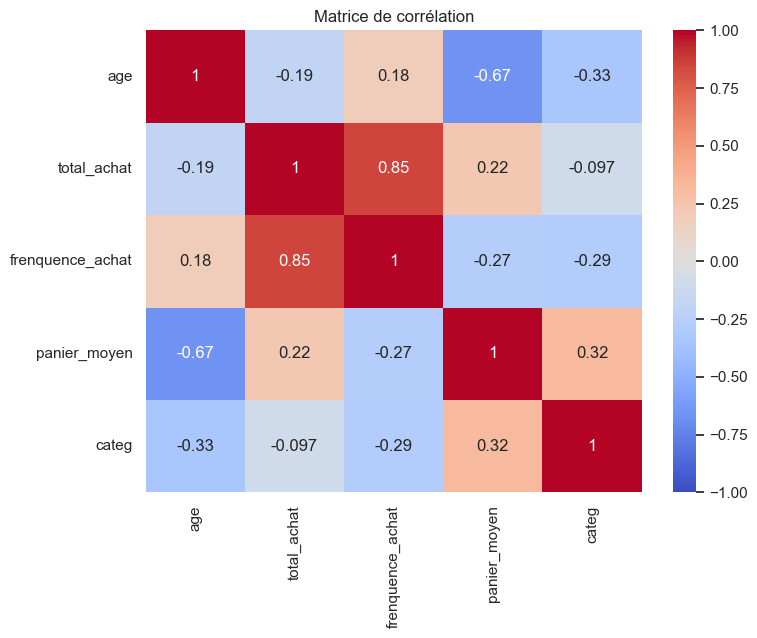

In [169]:

# Tracer la heatmap de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation")
plt.show()


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">8 - Conclusion</h2>
</div>

### <span style="color:RGB(51,165,182);">Conclusion</span>

Les résultats de la matrice de corrélation révèlent plusieurs relations significatives entre l'âge des clients, leurs habitudes d'achat, et les catégories de produits qu'ils préfèrent :

- **Âge et Panier Moyen** : Une corrélation négative modérément forte (-0.666535) indique que les clients plus âgés ont tendance à avoir un panier moyen plus faible.
  
  - **Conseil** : Créez des offres spéciales ou des promotions ciblées pour les groupes d'âge plus avancés, afin d'augmenter la taille de leur panier moyen. Adaptez également la sélection de produits ou les recommandations en fonction de l'âge.

- **Âge et Total des Achats** : Une légère corrélation négative (-0.189402) suggère que le total des achats diminue légèrement avec l'âge.
  
  - **Conseil** : Bien que cette corrélation soit faible, examinez les produits ou services que les clients plus âgés achètent moins fréquemment et réfléchissez à des stratégies pour encourager leurs achats dans ces catégories.

- **Âge et Fréquence d'Achat** : Une corrélation positive faible (0.176295) montre que les clients plus âgés achètent légèrement plus fréquemment.
  
  - **Conseil** : Capitalisez sur cette tendance en fidélisant davantage les clients plus âgés avec des programmes de fidélité, des newsletters personnalisées, ou des rappels d'achat réguliers.

- **Total des Achats et Fréquence d'Achat** : Une corrélation très forte (0.847650) confirme que plus un client achète fréquemment, plus son total d'achat est élevé.
  
  - **Conseil** : Encouragez la fréquence des achats avec des offres limitées dans le temps, des abonnements, ou des avantages pour les clients réguliers.

- **Panier Moyen et Fréquence d'Achat** : Une corrélation négative modérée (-0.270738) indique que les clients qui achètent plus souvent ont tendance à avoir un panier moyen plus faible.
  
  - **Conseil** : Explorez des moyens d'augmenter le panier moyen pour les acheteurs fréquents, comme des ventes incitatives (« upselling »), des suggestions de produits complémentaires, ou des seuils pour obtenir des réductions.

- **Panier Moyen et Catégorie de Produits** : Une corrélation positive modérée (0.318386) suggère que certaines catégories de produits sont associées à des paniers moyens plus élevés.
  
  - **Conseil** : Identifiez les catégories de produits qui conduisent à des paniers moyens plus élevés et concentrez vos efforts marketing sur celles-ci. Proposez des recommandations basées sur ces catégories pour encourager des achats plus importants.

### <span style="color:RGB(51,165,182);">Résumé des Conseils</span>

- **Segmentez par Âge** : Personnalisez les offres et recommandations pour chaque groupe d'âge.
- **Fidélisez les Clients** : Augmentez la fréquence des achats avec des avantages pour les clients réguliers.
- **Augmentez le Panier Moyen** : Utilisez des techniques d'upselling et des recommandations ciblées pour accroître la valeur moyenne des paniers.
- **Ciblez les Catégories** : Mettez en avant les catégories de produits qui génèrent des paniers moyens plus élevés.
